In [1]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from pandas.stats.api import ols
from sklearn import linear_model
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


### remove outliers
### pick a model that doesn't require a linearity assumption

In [2]:
features = pd.read_csv('../data_processed/00DATASET_READY.csv')

In [3]:
features = features.drop('Unnamed: 0',axis=1)

In [4]:
features.head()

CBG  com_count        Date  vio_count  year     pop  female_r  \
0  360050001001        0.0  2014-03-17        0.0  2014  8430.0  0.092052   
1  360050002001        0.0  2014-03-17        0.0  2014  1519.0  0.516129   
2  360050002002        0.0  2014-03-17        0.0  2014  1888.0  0.518538   
3  360050002003        0.0  2014-03-17        0.0  2014  1688.0  0.492891   
4  360050004001        1.0  2014-03-17        0.0  2014   825.0  0.392727   

   elderly_r   white_r   black_r      ...        longercommute_r  \
0   0.003440  0.140451  0.575445      ...               0.000000   
1   0.143515  0.134957  0.420013      ...               0.623209   
2   0.097987  0.492055  0.249470      ...               0.443787   
3   0.065758  0.279621  0.186019      ...               0.291899   
4   0.038788  0.132121  0.360000      ...               0.387302   

   avg_bldng_age  gas_utility_r  ownership_r  Temp_min (F)  Prep_sum (in)  \
0       0.000000       0.000000     0.000000          25.0           0.72   
1      63.282609       0.813043     0.656522          25.0           0.72   
2      56.682836       0.711579     0.568421          25.0           0.72   
3      33.354906       0.891892     0.518018          25.0           0.72   
4      48.741325       0.816733     0.525896          25.0           0.72   

   Snow (in)  WindSpeed (mph)  Weather_events  Holiday_Count  
0        0.0             14.0             0.0            0.0  
1        0.0             14.0             0.0            0.0  
2        0.0             14.0             0.0            0.0  
3        0.0             14.0             0.0            0.0  
4        0.0             14.0             0.0            0.0  

[5 rows x 31 columns]

In [5]:
features.com_count.unique()

array([   0.,    1.,    2.,    5.,    4.,    3.,   31.,   12.,    6.,
         39.,    7.,    9.,   11.,   15.,   14.,    8.,   23.,   33.,
         10.,   16.,   19.,   41.,   27.,   25.,   30.,   13.,   24.,
         17.,   20.,   58.,   51.,   35.,   28.,  104.,   22.,   18.,
         42.,   21.,  114.,   46.,   48.,   29.,   79.,   26.,   40.,
         96.,   37.,   59.,  124.,   50.,  115.,   87.,   44.,   52.,
         53.,   43.,   34.,  107.,   84.,   45.,   32.,   73.,   57.,
         49.,   36.,   62.,   38.,   67.,   56.,   68.,   90.,   72.,
         65.,  103.,  108.,   47.,   70.,   61.,   60.,   54.,   55.,
        109.,   94.,  113.,  137.,   83.,  117.,   66.,  165.,   75.,
         71.,  127.,  123.,  112.,  214.,  102.,  163.,  219.,   86.,
         64.,  125.,  139.,   63.,   97.,   89.,  128.,  106.,  166.,
         95.,   93.,   82.,   81.,  142.,   77.,   74.,  220.,   85.,   98.])

In [6]:
pluto_14 = pd.read_csv('../data_processed/mapPluto_features_14')
pluto_15 = pd.read_csv('../data_processed/mapPluto_features_15')
pluto_16 = pd.read_csv('../data_processed/mapPluto_features_16')

pluto_14 = pluto_14.drop('Unnamed: 0',axis=1)
pluto_15 = pluto_15.drop('Unnamed: 0',axis=1)
pluto_16 = pluto_16.drop('Unnamed: 0',axis=1)

In [7]:
pluto_14['year'] = 2014
pluto_15['year'] = 2015
pluto_16['year'] = 2016

In [8]:
print features['year'].dtypes
print pluto_14['year'].dtypes

int64
int64


In [9]:
pluto_14.columns

Index([u'GEOID', u'AssessTot', u'UnitsResNonGovt', u'ResAreaNonGovt',
       u'UnitsRes', u'ResArea', u'BldgArea', u'year'],
      dtype='object')

In [10]:
features_14 = features[features['year'] == 2014]
features_15 = features[features['year'] == 2015]
features_16 = features[features['year'] == 2016]

In [11]:
print features_14['CBG'].dtypes
print pluto_14['GEOID'].dtypes

int64
int64


In [12]:
print len(features_14)
print len(pluto_14)

248304
6450


In [13]:
feat_up_14 = pd.merge(features_14, pluto_14, left_on='CBG', right_on='GEOID')
feat_up_15 = pd.merge(features_15, pluto_15, left_on='CBG', right_on='GEOID')
feat_up_16 = pd.merge(features_16, pluto_16, left_on='CBG', right_on='GEOID')

### instead of dropping black and asian, create a diversity index

In [14]:
#feat_up_14 = feat_up_14.drop(['black_r','asian_r'],axis=1)
#feat_up_15 = feat_up_15.drop(['black_r','asian_r'],axis=1)
#feat_up_16 = feat_up_16.drop(['black_r','asian_r'],axis=1)

In [15]:
print len(feat_up_14)
print len(feat_up_15)
print len(feat_up_16)

248304
307424
307424


In [16]:
print len(features_14['CBG'].unique())
print len(pluto_14['GEOID'].unique())
print '\n'
print len(features_15['CBG'].unique())
print len(pluto_15['GEOID'].unique())
print '\n'
print len(features_16['CBG'].unique())
print len(pluto_16['GEOID'].unique())

5912
6450


5912
6447


5912
6451


In [17]:
feat_up_14.columns

Index([u'CBG', u'com_count', u'Date', u'vio_count', u'year_x', u'pop',
       u'female_r', u'elderly_r', u'white_r', u'black_r', u'asian_r', u'hh',
       u'hh_child_6_r', u'hh_living_alone_r', u'edu_high_r', u'non_eng_r',
       u'unemployed_r', u'vacancy_r', u'med_rent', u'med_income', u'merried_r',
       u'longercommute_r', u'avg_bldng_age', u'gas_utility_r', u'ownership_r',
       u'Temp_min (F)', u'Prep_sum (in)', u'Snow (in)', u'WindSpeed (mph)',
       u'Weather_events', u'Holiday_Count', u'GEOID', u'AssessTot',
       u'UnitsResNonGovt', u'ResAreaNonGovt', u'UnitsRes', u'ResArea',
       u'BldgArea', u'year_y'],
      dtype='object')

In [18]:
feat_up_14 = feat_up_14.drop(['GEOID', 'year_y'],axis=1)
feat_up_14 = feat_up_14.rename(columns={'year_x':'year','merried_r':'married_r'})
feat_up_15 = feat_up_15.drop(['GEOID', 'year_y'],axis=1)
feat_up_15 = feat_up_15.rename(columns={'year_x':'year','merried_r':'married_r'})
feat_up_16 = feat_up_16.drop(['GEOID', 'year_y'],axis=1)
feat_up_16 = feat_up_16.rename(columns={'year_x':'year','merried_r':'married_r'})

In [19]:
feat_up_14.head(2)

CBG  com_count        Date  vio_count  year     pop  female_r  \
0  360050001001        0.0  2014-03-17        0.0  2014  8430.0  0.092052   
1  360050001001        0.0  2014-03-24        0.0  2014  8430.0  0.092052   

   elderly_r   white_r   black_r    ...     Snow (in)  WindSpeed (mph)  \
0    0.00344  0.140451  0.575445    ...           0.0             14.0   
1    0.00344  0.140451  0.575445    ...           0.0             14.0   

   Weather_events  Holiday_Count    AssessTot  UnitsResNonGovt  \
0             0.0            0.0  474367500.0              0.0   
1             0.0            0.0  474367500.0              0.0   

   ResAreaNonGovt  UnitsRes  ResArea  BldgArea  
0             0.0         0        0   5502107  
1             0.0         0        0   5502107  

[2 rows x 37 columns]

In [20]:
feat_up_15.head(2)

CBG  com_count        Date  vio_count  year  pop  female_r  \
0  360050001001        0.0  2015-01-05        0.0  2015  NaN       NaN   
1  360050001001        0.0  2015-01-12        0.0  2015  NaN       NaN   

   elderly_r  white_r  black_r    ...     Snow (in)  WindSpeed (mph)  \
0        NaN      NaN      NaN    ...           0.3             16.0   
1        NaN      NaN      NaN    ...           0.1             12.0   

   Weather_events  Holiday_Count    AssessTot  UnitsResNonGovt  \
0             1.0            1.0  488598750.0              0.0   
1             2.0            0.0  488598750.0              0.0   

   ResAreaNonGovt  UnitsRes  ResArea  BldgArea  
0             0.0         0        0   5502107  
1             0.0         0        0   5502107  

[2 rows x 37 columns]

In [21]:
feat_up_16.head(2)

CBG  com_count        Date  vio_count  year     pop  female_r  \
0  360050001001        0.0  2016-01-04        0.0  2016  7703.0  0.073997   
1  360050001001        0.0  2016-01-11        0.0  2016  7703.0  0.073997   

   elderly_r   white_r   black_r    ...     Snow (in)  WindSpeed (mph)  \
0   0.002726  0.099052  0.629106    ...           0.0             11.0   
1   0.002726  0.099052  0.629106    ...           0.0             15.0   

   Weather_events  Holiday_Count    AssessTot  UnitsResNonGovt  \
0             1.0            1.0  463249350.0              0.0   
1             1.0            0.0  463249350.0              0.0   

   ResAreaNonGovt  UnitsRes  ResArea  BldgArea  
0             0.0         0        0   5502107  
1             0.0         0        0   5502107  

[2 rows x 37 columns]

### time series plot

In [22]:
cbgs = [elem for elem in feat_up_14.CBG.unique()]
len(cbgs)

5912

In [23]:
cbgs2 = cbgs[:10]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


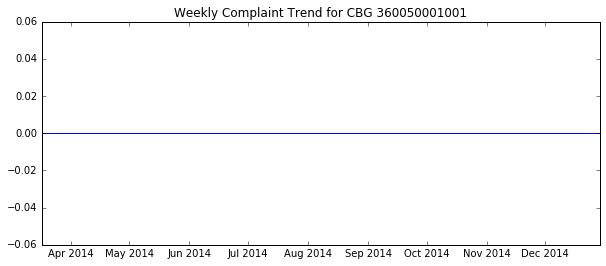

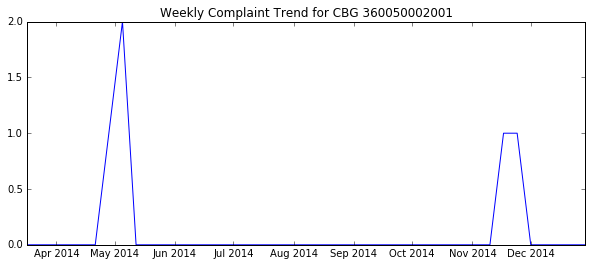

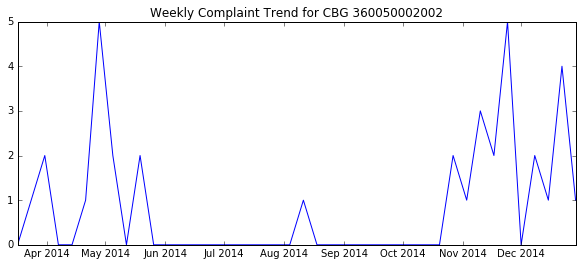

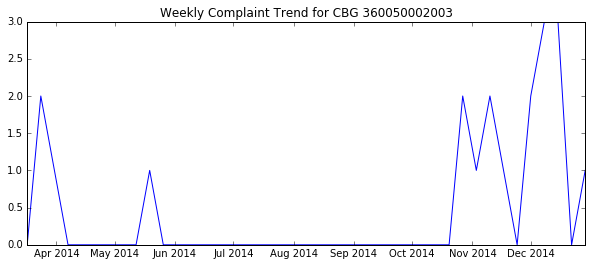

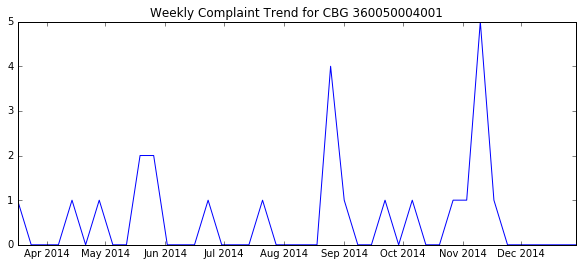

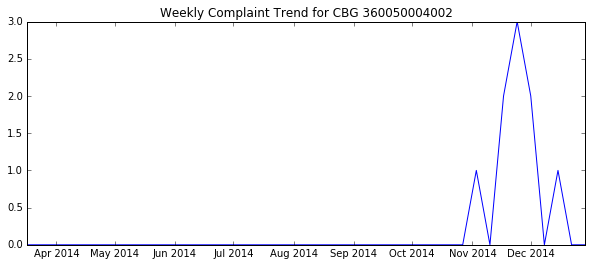

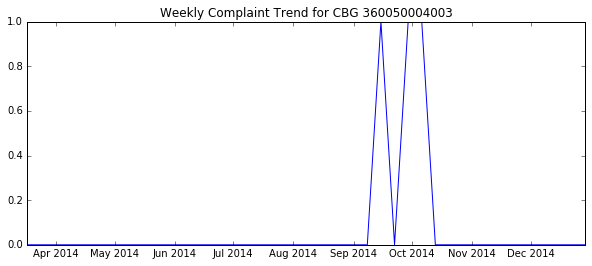

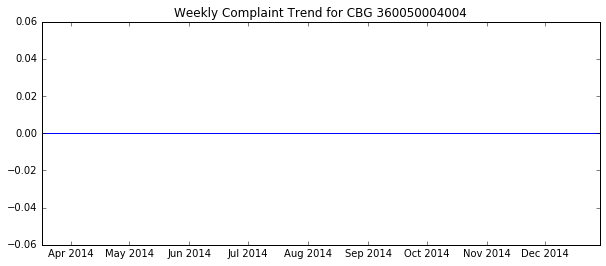

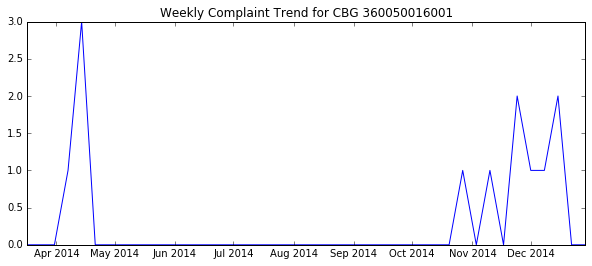

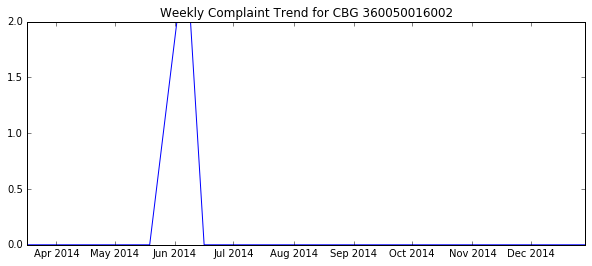

In [24]:
for elem in cbgs2:
    time = feat_up_14[feat_up_14['CBG'] == elem]
    time['Date'] = pd.to_datetime(time['Date'])
    time = time[['Date','com_count']]
    plt.figure(figsize=(10,4))
    plt.plot(time['Date'], time['com_count'])
    plt.title('Weekly Complaint Trend for CBG ' + str(elem))

### cluster on time series
#### one cbg
similar weeks

In [25]:
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import numpy as np

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


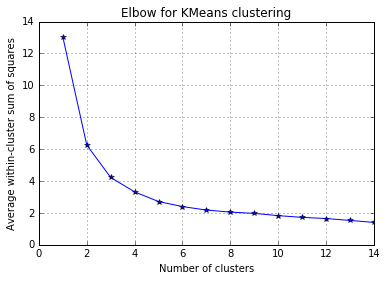

[(0, 0    2014-03-17
2    2014-03-31
3    2014-04-07
5    2014-04-21
8    2014-05-12
29   2014-10-06
31   2014-10-20
32   2014-10-27
33   2014-11-03
34   2014-11-10
40   2014-12-22
Name: Date, dtype: datetime64[ns]), (1, 7    2014-05-05
9    2014-05-19
11   2014-06-02
12   2014-06-09
13   2014-06-16
14   2014-06-23
15   2014-06-30
17   2014-07-14
18   2014-07-21
19   2014-07-28
20   2014-08-04
21   2014-08-11
23   2014-08-25
25   2014-09-08
26   2014-09-15
27   2014-09-22
28   2014-09-29
Name: Date, dtype: datetime64[ns]), (2, 22   2014-08-18
Name: Date, dtype: datetime64[ns]), (3, 1    2014-03-24
6    2014-04-28
38   2014-12-08
Name: Date, dtype: datetime64[ns]), (4, 10   2014-05-26
16   2014-07-07
24   2014-09-01
30   2014-10-13
35   2014-11-17
37   2014-12-01
41   2014-12-29
Name: Date, dtype: datetime64[ns]), (5, 4    2014-04-14
36   2014-11-24
39   2014-12-15
Name: Date, dtype: datetime64[ns])]


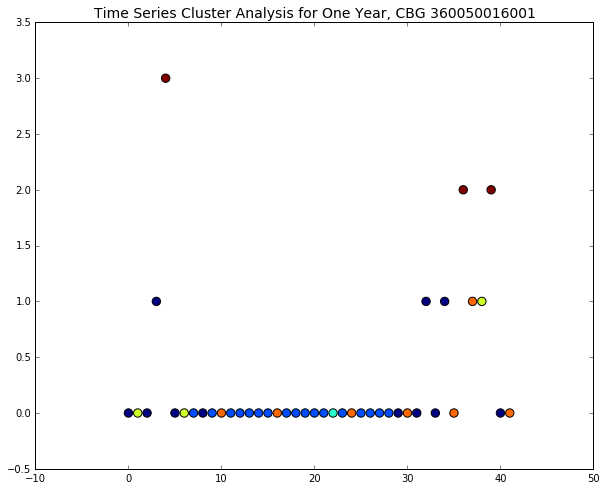

In [26]:
time = feat_up_14[feat_up_14['CBG'] == 360050016001]
time['Date'] = pd.to_datetime(time['Date'])
time = time.set_index(time['Date'])
time = time.drop(['CBG','Date'],axis=1)
time_stand = (time - time.mean()) / time.std()
time_stand.head()
time_stand = time_stand.dropna(axis=1)
time_stand = time_stand.drop(['female_r','elderly_r','white_r','hh_child_6_r','hh_living_alone_r','edu_high_r',\
                              'non_eng_r','unemployed_r','vacancy_r','married_r','longercommute_r',\
                             'avg_bldng_age','gas_utility_r'],axis=1)
def elbow(data,K):
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
     
    # elbow curve
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()

elbow(time, range(1,15))

n = 6
KM=cluster.KMeans(n_clusters=n, random_state=123)# cluster=5
KM.fit(time_stand)
time_stand_KM=KM.predict(time_stand)
centers=KM.cluster_centers_
labels=KM.labels_
time_stand['cluster_label'] = labels
time_stand.head()
time = time.reset_index()
time['Date'] = pd.to_datetime(time['Date'])

plt.figure(figsize=(10,8))
plt.scatter([i for i in range(0,42)],time['com_count'],c=time_stand['cluster_label'].as_matrix(),s=70)
plt.title('Time Series Cluster Analysis for One Year, CBG 360050016001', fontsize=14)

time_stand = time_stand.reset_index()
groups = list(time_stand['Date'].groupby(time_stand['cluster_label']))
print groups

In [27]:
time_stand.head(2)

Date  com_count  Temp_min (F)  Prep_sum (in)  WindSpeed (mph)  \
0 2014-03-17  -0.424523     -1.516239      -0.306364         1.191521   
1 2014-03-24  -0.424523     -1.723223       1.465832         1.191521   

   Weather_events  Holiday_Count  cluster_label  
0       -0.154303      -0.441858              0  
1       -0.154303      -0.441858              3

### cluster on demographic features

In [28]:
feat_up_14.head(2)

CBG  com_count        Date  vio_count  year     pop  female_r  \
0  360050001001        0.0  2014-03-17        0.0  2014  8430.0  0.092052   
1  360050001001        0.0  2014-03-24        0.0  2014  8430.0  0.092052   

   elderly_r   white_r   black_r    ...     Snow (in)  WindSpeed (mph)  \
0    0.00344  0.140451  0.575445    ...           0.0             14.0   
1    0.00344  0.140451  0.575445    ...           0.0             14.0   

   Weather_events  Holiday_Count    AssessTot  UnitsResNonGovt  \
0             0.0            0.0  474367500.0              0.0   
1             0.0            0.0  474367500.0              0.0   

   ResAreaNonGovt  UnitsRes  ResArea  BldgArea  
0             0.0         0        0   5502107  
1             0.0         0        0   5502107  

[2 rows x 37 columns]

In [29]:
feat_up_14.columns

Index([u'CBG', u'com_count', u'Date', u'vio_count', u'year', u'pop',
       u'female_r', u'elderly_r', u'white_r', u'black_r', u'asian_r', u'hh',
       u'hh_child_6_r', u'hh_living_alone_r', u'edu_high_r', u'non_eng_r',
       u'unemployed_r', u'vacancy_r', u'med_rent', u'med_income', u'married_r',
       u'longercommute_r', u'avg_bldng_age', u'gas_utility_r', u'ownership_r',
       u'Temp_min (F)', u'Prep_sum (in)', u'Snow (in)', u'WindSpeed (mph)',
       u'Weather_events', u'Holiday_Count', u'AssessTot', u'UnitsResNonGovt',
       u'ResAreaNonGovt', u'UnitsRes', u'ResArea', u'BldgArea'],
      dtype='object')

In [30]:
demo_14 = feat_up_14.drop(['Date','Temp_min (F)','Prep_sum (in)','Snow (in)','WindSpeed (mph)','Weather_events',\
                          'Holiday_Count','com_count','com_count','vio_count'],axis=1)

In [31]:
com_avg = pd.DataFrame(feat_up_14['com_count'].groupby(feat_up_14['CBG']).mean())
com_avg = com_avg.reset_index()
com_avg = com_avg.rename(columns={'com_count':'com_ann_avg'})
com_sum = feat_up_14['com_count'].groupby(feat_up_14['CBG']).sum()
com_sum = com_sum.reset_index()
com_sum = com_sum.rename(columns={'com_count':'com_ann_sum'})

vio_avg = pd.DataFrame(feat_up_14['vio_count'].groupby(feat_up_14['CBG']).mean())
vio_avg = vio_avg.reset_index()
vio_avg = vio_avg.rename(columns={'vio_count':'vio_ann_avg'})
vio_sum = feat_up_14['vio_count'].groupby(feat_up_14['CBG']).sum()
vio_sum = vio_sum.reset_index()
vio_sum = vio_sum.rename(columns={'vio_count':'vio_ann_sum'})

In [32]:
com_avg.head()

CBG  com_ann_avg
0  360050001001     0.000000
1  360050002001     0.119048
2  360050002002     0.833333
3  360050002003     0.452381
4  360050004001     0.571429

In [33]:
demo_14 = demo_14.drop_duplicates()

In [34]:
print len(demo_14)
print len(feat_up_14['CBG'].unique())

5912
5912


### cluster by average violations and average complaints

In [35]:
demo_14 = pd.merge(demo_14, vio_avg, on='CBG')

In [36]:
demo_14 = pd.merge(demo_14, com_avg, on='CBG')

In [37]:
len(demo_14)

5912

In [38]:
demo_14.head()

CBG  year     pop  female_r  elderly_r   white_r   black_r  \
0  360050001001  2014  8430.0  0.092052   0.003440  0.140451  0.575445   
1  360050002001  2014  1519.0  0.516129   0.143515  0.134957  0.420013   
2  360050002002  2014  1888.0  0.518538   0.097987  0.492055  0.249470   
3  360050002003  2014  1688.0  0.492891   0.065758  0.279621  0.186019   
4  360050004001  2014   825.0  0.392727   0.038788  0.132121  0.360000   

    asian_r     hh  hh_child_6_r     ...       gas_utility_r  ownership_r  \
0  0.019810    0.0      0.000000     ...            0.000000     0.000000   
1  0.075049  252.0      0.277778     ...            0.813043     0.656522   
2  0.000000  339.0      0.165192     ...            0.711579     0.568421   
3  0.128555  380.0      0.131579     ...            0.891892     0.518018   
4  0.000000  222.0      0.076577     ...            0.816733     0.525896   

      AssessTot  UnitsResNonGovt  ResAreaNonGovt  UnitsRes  ResArea  BldgArea  \
0  4.743675e+08              0.0             0.0         0        0   5502107   
1  2.396658e+04            382.0        456559.0       382   456559    489868   
2  6.827599e+04            624.0        655173.0       625   656253    686993   
3  2.534404e+04            432.0        511832.0       432   511832    544790   
4  3.435581e+04            285.0        293748.0       285   293748    315389   

   vio_ann_avg  com_ann_avg  
0     0.000000     0.000000  
1     0.095238     0.119048  
2     0.285714     0.833333  
3     0.357143     0.452381  
4     0.404762     0.571429  

[5 rows x 30 columns]

### do i want to standardize along columns, so that each feature has a mean of 0 and std of 1 or do i want to standardize by row

In [39]:
demo_14_stand = (demo_14 - demo_14.mean()) / demo_14.std()
demo_14_stand.head()

CBG  year        pop  female_r  elderly_r   white_r   black_r  \
0 -1.810302   NaN  11.160874 -5.648586  -1.182731 -0.956789  1.059403   
1 -1.810298   NaN   0.274267 -0.075320   0.762489 -0.974098  0.554999   
2 -1.810298   NaN   0.855537 -0.043660   0.130241  0.151013  0.001556   
3 -1.810298   NaN   0.540485 -0.380717  -0.317321 -0.518305 -0.204355   
4 -1.810291   NaN  -0.818962 -1.697080  -0.691858 -0.983033  0.360245   

    asian_r        hh  hh_child_6_r     ...       gas_utility_r  ownership_r  \
0 -0.619579 -1.381968     -1.108435     ...           -2.543732    -1.256333   
1 -0.302752  0.047964      0.169990     ...            0.813507     1.196903   
2 -0.733201  0.541631     -0.348168     ...            0.394538     0.867695   
3  0.004130  0.774279     -0.502865     ...            1.139090     0.679354   
4 -0.733201 -0.122266     -0.756004     ...            0.828743     0.708793   

   AssessTot  UnitsResNonGovt  ResAreaNonGovt  UnitsRes   ResArea  BldgArea  \
0  10.228352        -0.859871       -0.854727 -0.832744 -0.882778  2.645746   
1  -0.076706        -0.308407       -0.213714 -0.333854 -0.249374 -0.282331   
2  -0.075743         0.040951        0.065142 -0.016498  0.027670 -0.167174   
3  -0.076676        -0.236225       -0.136110 -0.268555 -0.172691 -0.250247   
4  -0.076480        -0.448438       -0.442302 -0.460536 -0.475249 -0.384259   

   vio_ann_avg  com_ann_avg  
0    -0.538756    -0.556253  
1    -0.278942    -0.429954  
2     0.240686     0.327846  
3     0.435547    -0.076314  
4     0.565454     0.049986  

[5 rows x 30 columns]

In [40]:
#demo_14_stand.iloc[:,2:].std()

In [41]:
demo_14_stand = demo_14_stand.drop('year',axis=1)

In [42]:
demo_14_stand.head()

CBG        pop  female_r  elderly_r   white_r   black_r   asian_r  \
0 -1.810302  11.160874 -5.648586  -1.182731 -0.956789  1.059403 -0.619579   
1 -1.810298   0.274267 -0.075320   0.762489 -0.974098  0.554999 -0.302752   
2 -1.810298   0.855537 -0.043660   0.130241  0.151013  0.001556 -0.733201   
3 -1.810298   0.540485 -0.380717  -0.317321 -0.518305 -0.204355  0.004130   
4 -1.810291  -0.818962 -1.697080  -0.691858 -0.983033  0.360245 -0.733201   

         hh  hh_child_6_r  hh_living_alone_r     ...       gas_utility_r  \
0 -1.381968     -1.108435          -1.883158     ...           -2.543732   
1  0.047964      0.169990          -0.291165     ...            0.813507   
2  0.541631     -0.348168          -1.039824     ...            0.394538   
3  0.774279     -0.502865          -1.601216     ...            1.139090   
4 -0.122266     -0.756004          -0.736068     ...            0.828743   

   ownership_r  AssessTot  UnitsResNonGovt  ResAreaNonGovt  UnitsRes  \
0    -1.256333  10.228352        -0.859871       -0.854727 -0.832744   
1     1.196903  -0.076706        -0.308407       -0.213714 -0.333854   
2     0.867695  -0.075743         0.040951        0.065142 -0.016498   
3     0.679354  -0.076676        -0.236225       -0.136110 -0.268555   
4     0.708793  -0.076480        -0.448438       -0.442302 -0.460536   

    ResArea  BldgArea  vio_ann_avg  com_ann_avg  
0 -0.882778  2.645746    -0.538756    -0.556253  
1 -0.249374 -0.282331    -0.278942    -0.429954  
2  0.027670 -0.167174     0.240686     0.327846  
3 -0.172691 -0.250247     0.435547    -0.076314  
4 -0.475249 -0.384259     0.565454     0.049986  

[5 rows x 29 columns]

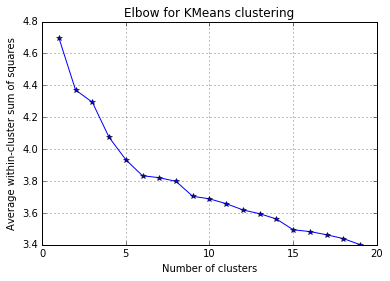

In [43]:
def elbow(data,K):
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
     
    # elbow curve
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()

elbow(demo_14_stand.iloc[:,1:], range(1,20))

In [44]:
n = 6
KM=cluster.KMeans(n_clusters=n, random_state=123)# cluster=5
KM.fit(demo_14_stand)
demo_14_stand_KM=KM.predict(demo_14_stand)
centers=KM.cluster_centers_
labels=KM.labels_
demo_14_stand['cluster_label'] = labels
demo_14_stand.head()

CBG        pop  female_r  elderly_r   white_r   black_r   asian_r  \
0 -1.810302  11.160874 -5.648586  -1.182731 -0.956789  1.059403 -0.619579   
1 -1.810298   0.274267 -0.075320   0.762489 -0.974098  0.554999 -0.302752   
2 -1.810298   0.855537 -0.043660   0.130241  0.151013  0.001556 -0.733201   
3 -1.810298   0.540485 -0.380717  -0.317321 -0.518305 -0.204355  0.004130   
4 -1.810291  -0.818962 -1.697080  -0.691858 -0.983033  0.360245 -0.733201   

         hh  hh_child_6_r  hh_living_alone_r      ...        ownership_r  \
0 -1.381968     -1.108435          -1.883158      ...          -1.256333   
1  0.047964      0.169990          -0.291165      ...           1.196903   
2  0.541631     -0.348168          -1.039824      ...           0.867695   
3  0.774279     -0.502865          -1.601216      ...           0.679354   
4 -0.122266     -0.756004          -0.736068      ...           0.708793   

   AssessTot  UnitsResNonGovt  ResAreaNonGovt  UnitsRes   ResArea  BldgArea  \
0  10.228352        -0.859871       -0.854727 -0.832744 -0.882778  2.645746   
1  -0.076706        -0.308407       -0.213714 -0.333854 -0.249374 -0.282331   
2  -0.075743         0.040951        0.065142 -0.016498  0.027670 -0.167174   
3  -0.076676        -0.236225       -0.136110 -0.268555 -0.172691 -0.250247   
4  -0.076480        -0.448438       -0.442302 -0.460536 -0.475249 -0.384259   

   vio_ann_avg  com_ann_avg  cluster_label  
0    -0.538756    -0.556253              4  
1    -0.278942    -0.429954              5  
2     0.240686     0.327846              3  
3     0.435547    -0.076314              0  
4     0.565454     0.049986              5  

[5 rows x 30 columns]

In [45]:
import geopandas as gpd

In [46]:
cbg = gpd.read_file('../data_initial/cb_2014_36_bg_500k.shp')

In [47]:
cbg.head(2)

AFFGEOID    ALAND   AWATER BLKGRPCE COUNTYFP         GEOID  \
0  1500000US360610069000        0   272741        0      061  360610069000   
1  1500000US361031347034  1394508  1760241        4      103  361031347034   

  LSAD NAME STATEFP TRACTCE                                           geometry  
0   BG    0      36  006900  POLYGON Z ((-74.0203883683071 40.7303168209907...  
1   BG    4      36  134703  POLYGON Z ((-73.299166 40.91818 0, -73.2944299...

In [48]:
cbg = cbg[['GEOID','geometry']]
cbg = cbg.rename(columns={'GEOID':'CBG'})

In [49]:
demo_14.head(2)

CBG  year     pop  female_r  elderly_r   white_r   black_r  \
0  360050001001  2014  8430.0  0.092052   0.003440  0.140451  0.575445   
1  360050002001  2014  1519.0  0.516129   0.143515  0.134957  0.420013   

    asian_r     hh  hh_child_6_r     ...       gas_utility_r  ownership_r  \
0  0.019810    0.0      0.000000     ...            0.000000     0.000000   
1  0.075049  252.0      0.277778     ...            0.813043     0.656522   

      AssessTot  UnitsResNonGovt  ResAreaNonGovt  UnitsRes  ResArea  BldgArea  \
0  4.743675e+08              0.0             0.0         0        0   5502107   
1  2.396658e+04            382.0        456559.0       382   456559    489868   

   vio_ann_avg  com_ann_avg  
0     0.000000     0.000000  
1     0.095238     0.119048  

[2 rows x 30 columns]

In [50]:
demo_14['cluster'] = demo_14_stand['cluster_label']

In [51]:
demo_14_graph = demo_14[['CBG','cluster']]

In [52]:
cbg.head(2)

CBG                                           geometry
0  360610069000  POLYGON Z ((-74.0203883683071 40.7303168209907...
1  361031347034  POLYGON Z ((-73.299166 40.91818 0, -73.2944299...

In [53]:
demo_14.head(2)

CBG  year     pop  female_r  elderly_r   white_r   black_r  \
0  360050001001  2014  8430.0  0.092052   0.003440  0.140451  0.575445   
1  360050002001  2014  1519.0  0.516129   0.143515  0.134957  0.420013   

    asian_r     hh  hh_child_6_r   ...     ownership_r     AssessTot  \
0  0.019810    0.0      0.000000   ...        0.000000  4.743675e+08   
1  0.075049  252.0      0.277778   ...        0.656522  2.396658e+04   

   UnitsResNonGovt  ResAreaNonGovt  UnitsRes  ResArea  BldgArea  vio_ann_avg  \
0              0.0             0.0         0        0   5502107     0.000000   
1            382.0        456559.0       382   456559    489868     0.095238   

   com_ann_avg  cluster  
0     0.000000        4  
1     0.119048        5  

[2 rows x 31 columns]

In [54]:
cbg['CBG'] = cbg['CBG'].astype(int)

In [55]:
demo_14.dtypes

CBG                    int64
year                   int64
pop                  float64
female_r             float64
elderly_r            float64
white_r              float64
black_r              float64
asian_r              float64
hh                   float64
hh_child_6_r         float64
hh_living_alone_r    float64
edu_high_r           float64
non_eng_r            float64
unemployed_r         float64
vacancy_r            float64
med_rent             float64
med_income           float64
married_r            float64
longercommute_r      float64
avg_bldng_age        float64
gas_utility_r        float64
ownership_r          float64
AssessTot            float64
UnitsResNonGovt      float64
ResAreaNonGovt       float64
UnitsRes               int64
ResArea                int64
BldgArea               int64
vio_ann_avg          float64
com_ann_avg          float64
cluster                int32
dtype: object

In [56]:
geo = pd.merge(cbg, demo_14_graph, on='CBG')

In [57]:
type(geo)

geopandas.geodataframe.GeoDataFrame

In [58]:
geo.head(2)

CBG                                           geometry  cluster
0  360470181004  POLYGON Z ((-73.97213599999999 40.689582 0, -7...        3
1  360810317002  POLYGON Z ((-73.894683 40.770321 0, -73.889039...        3

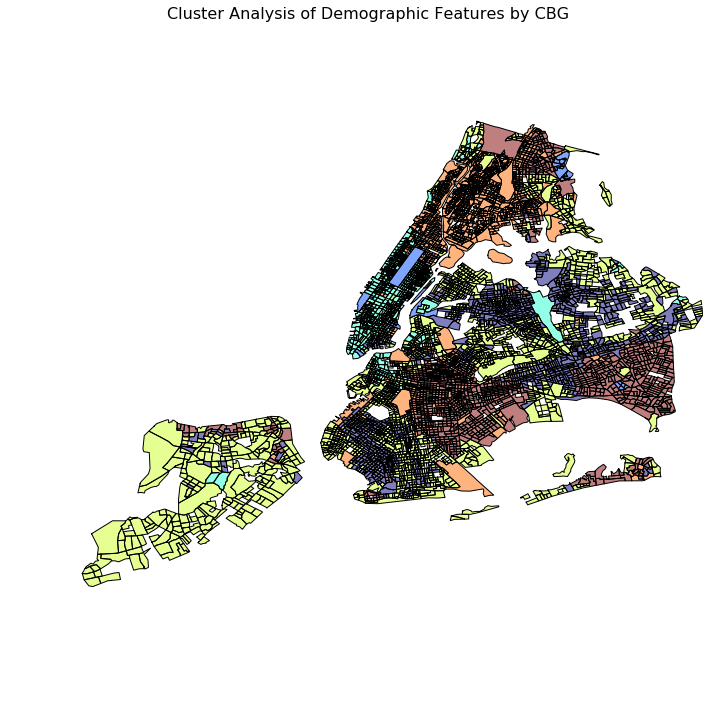

In [59]:
f, ax = plt.subplots(figsize=(12,12))
geo.plot(column='cluster',ax=ax)
ax.set_axis_off()
plt.title('Cluster Analysis of Demographic Features by CBG',fontsize=16)

In [60]:
demo_14_stand.head()

CBG        pop  female_r  elderly_r   white_r   black_r   asian_r  \
0 -1.810302  11.160874 -5.648586  -1.182731 -0.956789  1.059403 -0.619579   
1 -1.810298   0.274267 -0.075320   0.762489 -0.974098  0.554999 -0.302752   
2 -1.810298   0.855537 -0.043660   0.130241  0.151013  0.001556 -0.733201   
3 -1.810298   0.540485 -0.380717  -0.317321 -0.518305 -0.204355  0.004130   
4 -1.810291  -0.818962 -1.697080  -0.691858 -0.983033  0.360245 -0.733201   

         hh  hh_child_6_r  hh_living_alone_r      ...        ownership_r  \
0 -1.381968     -1.108435          -1.883158      ...          -1.256333   
1  0.047964      0.169990          -0.291165      ...           1.196903   
2  0.541631     -0.348168          -1.039824      ...           0.867695   
3  0.774279     -0.502865          -1.601216      ...           0.679354   
4 -0.122266     -0.756004          -0.736068      ...           0.708793   

   AssessTot  UnitsResNonGovt  ResAreaNonGovt  UnitsRes   ResArea  BldgArea  \
0  10.228352        -0.859871       -0.854727 -0.832744 -0.882778  2.645746   
1  -0.076706        -0.308407       -0.213714 -0.333854 -0.249374 -0.282331   
2  -0.075743         0.040951        0.065142 -0.016498  0.027670 -0.167174   
3  -0.076676        -0.236225       -0.136110 -0.268555 -0.172691 -0.250247   
4  -0.076480        -0.448438       -0.442302 -0.460536 -0.475249 -0.384259   

   vio_ann_avg  com_ann_avg  cluster_label  
0    -0.538756    -0.556253              4  
1    -0.278942    -0.429954              5  
2     0.240686     0.327846              3  
3     0.435547    -0.076314              0  
4     0.565454     0.049986              5  

[5 rows x 30 columns]

### regression on different clusters

In [61]:
demo_14_stand.columns

Index([u'CBG', u'pop', u'female_r', u'elderly_r', u'white_r', u'black_r',
       u'asian_r', u'hh', u'hh_child_6_r', u'hh_living_alone_r', u'edu_high_r',
       u'non_eng_r', u'unemployed_r', u'vacancy_r', u'med_rent', u'med_income',
       u'married_r', u'longercommute_r', u'avg_bldng_age', u'gas_utility_r',
       u'ownership_r', u'AssessTot', u'UnitsResNonGovt', u'ResAreaNonGovt',
       u'UnitsRes', u'ResArea', u'BldgArea', u'vio_ann_avg', u'com_ann_avg',
       u'cluster_label'],
      dtype='object')

In [62]:
dfs = []
for i in range(0,len(demo_14_stand['cluster_label'].unique())):
    k = demo_14[demo_14_stand['cluster_label'] == i]
    dfs.append(k)

In [63]:
demo_14_stand.columns[1:-2]

Index([u'pop', u'female_r', u'elderly_r', u'white_r', u'black_r', u'asian_r',
       u'hh', u'hh_child_6_r', u'hh_living_alone_r', u'edu_high_r',
       u'non_eng_r', u'unemployed_r', u'vacancy_r', u'med_rent', u'med_income',
       u'married_r', u'longercommute_r', u'avg_bldng_age', u'gas_utility_r',
       u'ownership_r', u'AssessTot', u'UnitsResNonGovt', u'ResAreaNonGovt',
       u'UnitsRes', u'ResArea', u'BldgArea', u'vio_ann_avg'],
      dtype='object')

In [64]:
cols = []
for elem in demo_14_stand.columns[1:-2]:
    cols.append(elem)

In [65]:
e = []
for elem in cols:
    e.append(' + ' + elem)
e = ''.join(e)

In [66]:
for i in range(0,len(demo_14_stand['cluster_label'].unique())):
    print(demo_14[demo_14_stand['cluster_label'] == i].mean())
    print('\n')

CBG                  3.606762e+11
year                 2.014000e+03
pop                  1.559594e+03
female_r             5.001750e-01
elderly_r            8.114362e-02
white_r              3.761156e-01
black_r              5.616061e-02
asian_r              3.841464e-01
hh                   3.058871e+02
hh_child_6_r         2.599681e-01
hh_living_alone_r    2.065282e-01
edu_high_r           2.416347e-01
non_eng_r            3.077108e-01
unemployed_r         5.710631e-02
vacancy_r            7.015214e-02
med_rent             1.150900e+03
med_income           4.945712e+04
married_r            5.178670e-01
longercommute_r      5.273180e-01
avg_bldng_age        5.988319e+01
gas_utility_r        7.451447e-01
ownership_r          3.441121e-01
AssessTot            5.833014e+05
UnitsResNonGovt      5.157049e+02
ResAreaNonGovt       5.196423e+05
UnitsRes             5.286198e+02
ResArea              5.270663e+05
BldgArea             7.735955e+05
vio_ann_avg          9.671380e-02
com_ann_avg   

In [67]:
def regress(data):
    results = smf.ols('com_ann_avg ~ ' + e, data=data).fit()
    print(results.summary())
    for i, elem in enumerate(demo_14.columns[1:-2]):
        results = smf.ols('com_ann_avg ~ ' + elem, data=data).fit()
        if results.pvalues[1] < .05:
            plt.figure(figsize=(10,10))
            plt.plot(data[elem], data['com_ann_avg'], 'r.')
            plt.plot(data[elem], results.predict(sm.add_constant(data[elem])), '-')
            plt.title('figure ' + str(i) + ':\naverage annual heat and hot water complaints 2014 ' + \
                      elem + '\nNYC Census Block Group', fontsize=16)
            plt.xlabel(elem, fontsize=14)
            plt.ylabel('volume of heat and hot water complapints', fontsize=14)

                            OLS Regression Results                            
Dep. Variable:            com_ann_avg   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     15.46
Date:                Thu, 23 Mar 2017   Prob (F-statistic):           4.90e-59
Time:                        14:21:31   Log-Likelihood:                -369.34
No. Observations:                1081   AIC:                             794.7
Df Residuals:                    1053   BIC:                             934.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1200      0.18

/Users/kristikorsberg/devel/venv/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


                            OLS Regression Results                            
Dep. Variable:            com_ann_avg   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     8.225
Date:                Thu, 23 Mar 2017   Prob (F-statistic):           9.18e-28
Time:                        14:21:33   Log-Likelihood:                -505.32
No. Observations:                 754   AIC:                             1067.
Df Residuals:                     726   BIC:                             1196.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0173      0.36

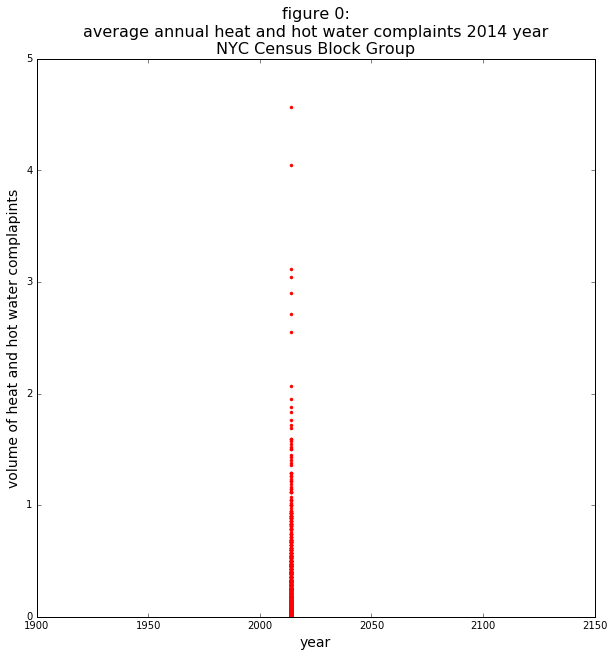

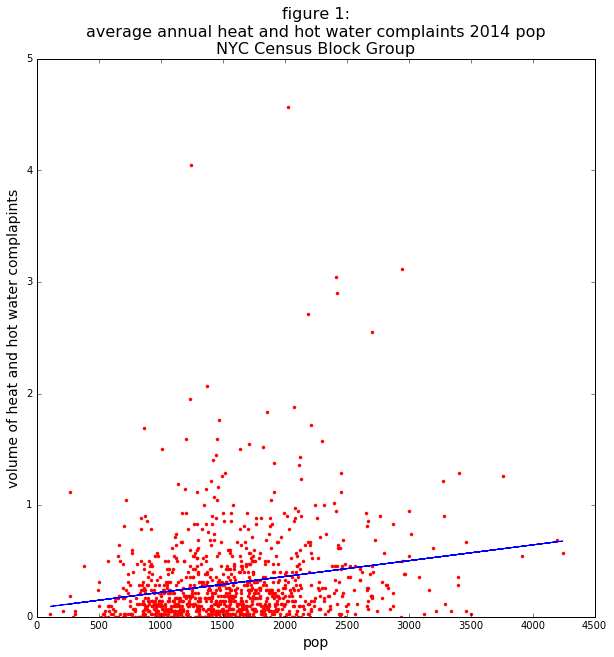

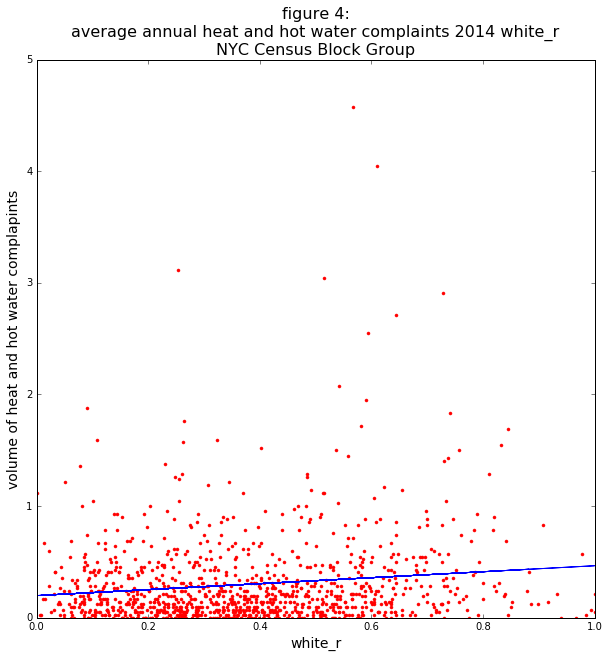

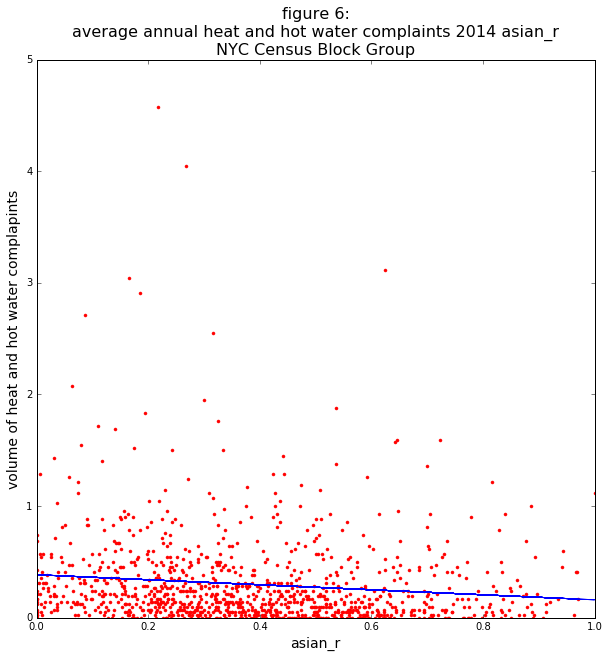

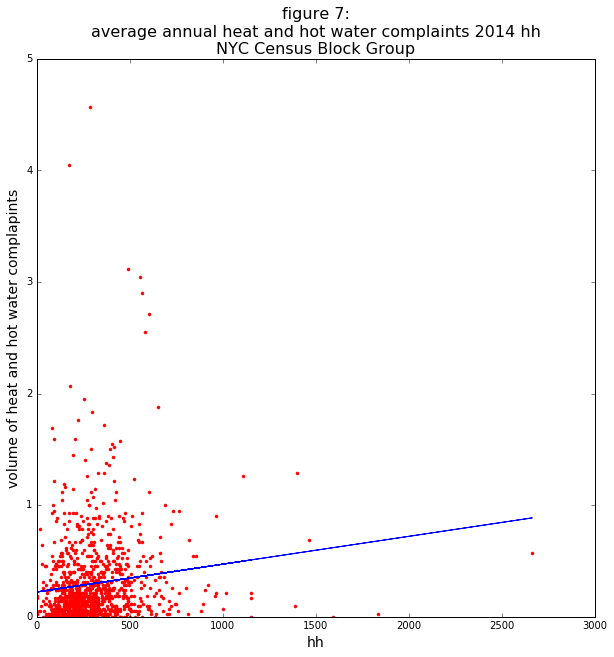

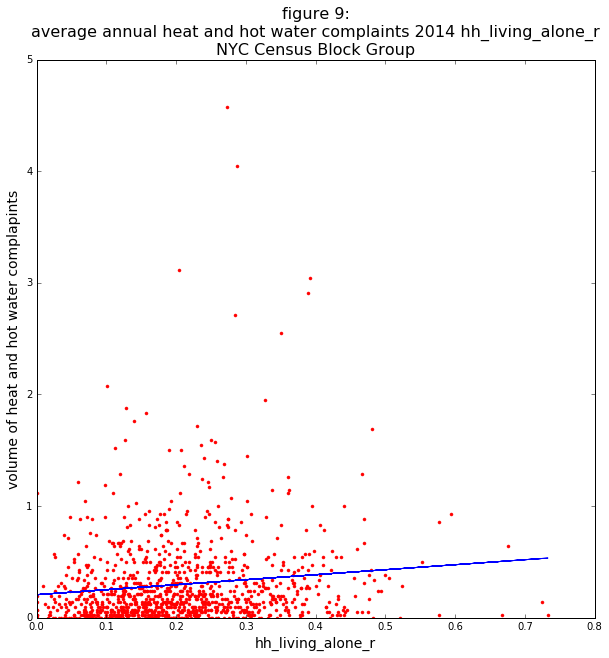

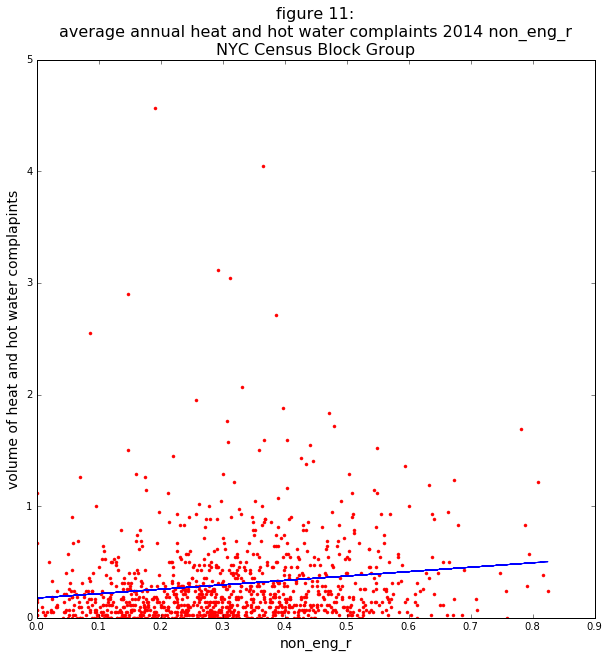

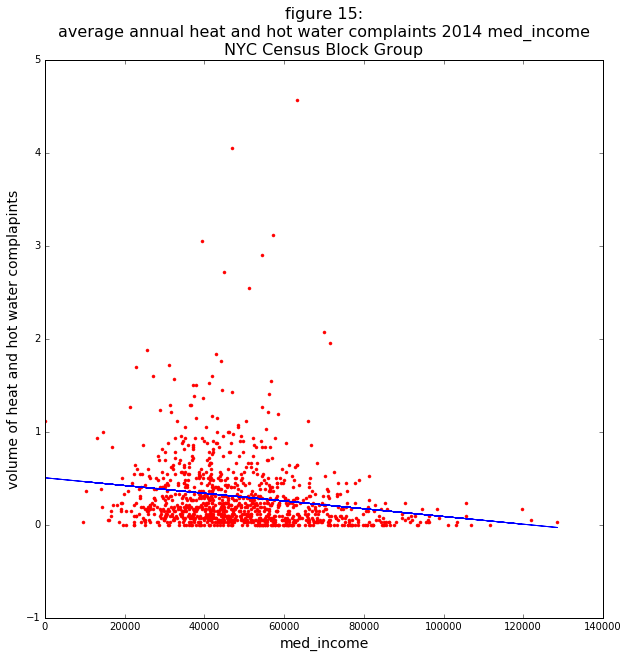

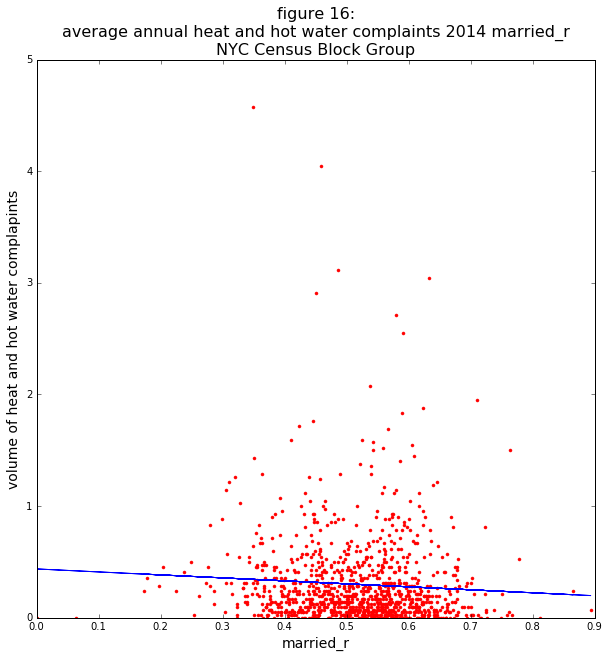

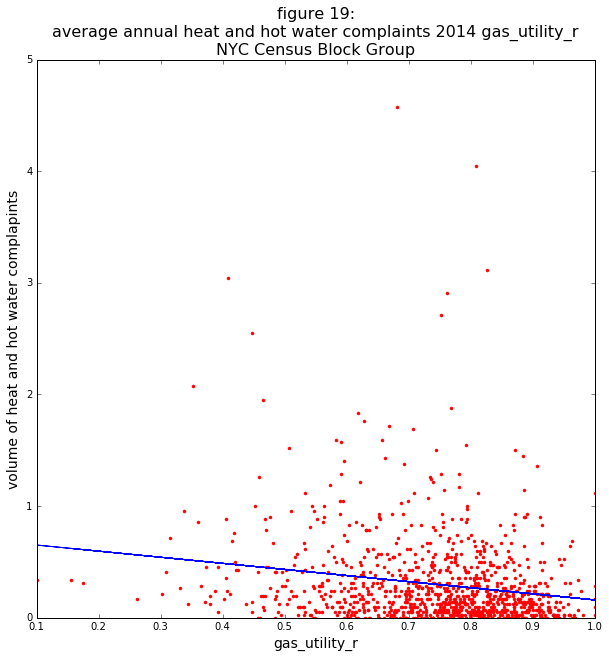

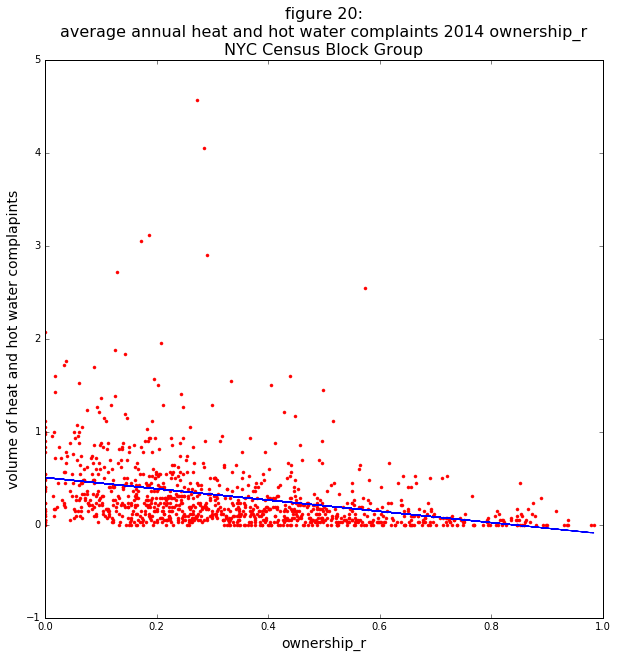

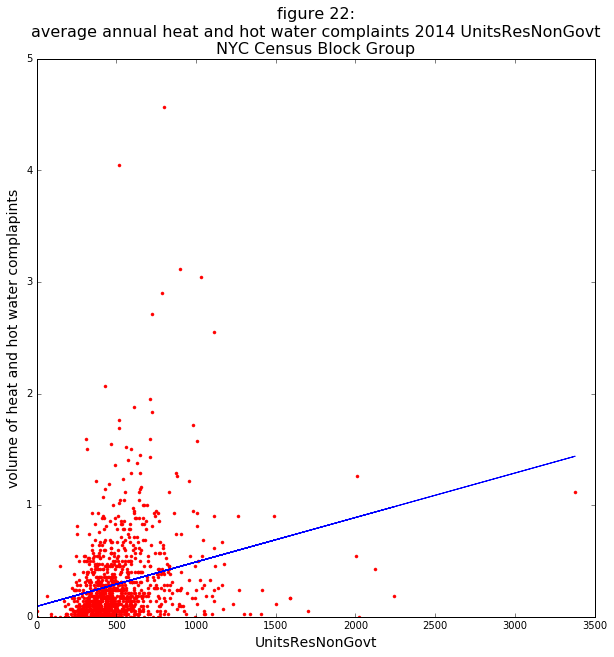

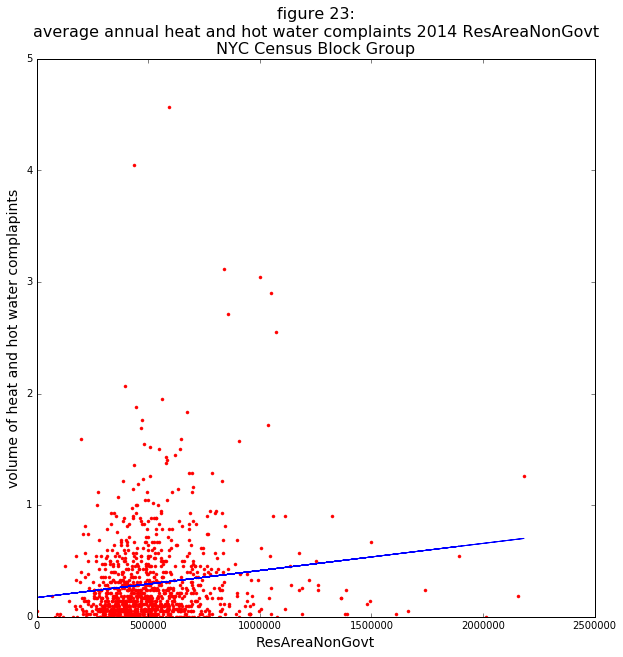

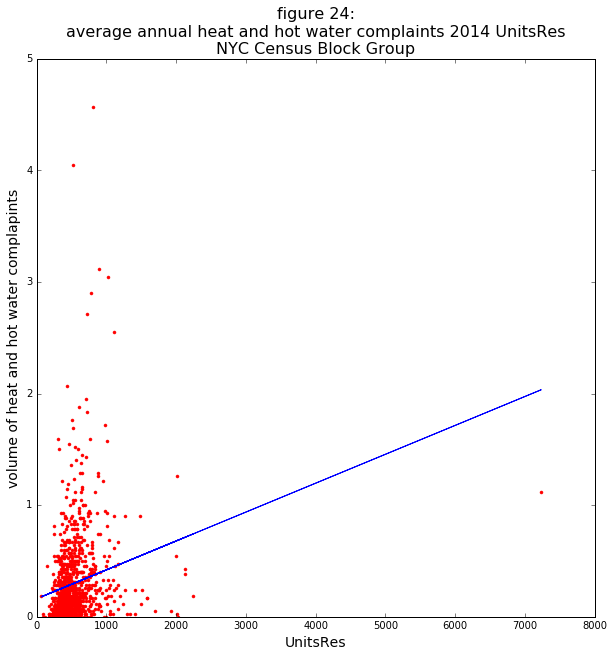

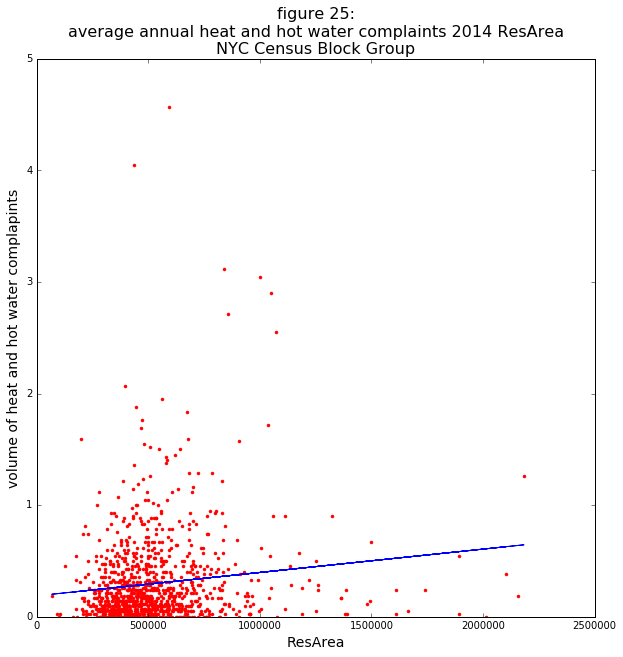

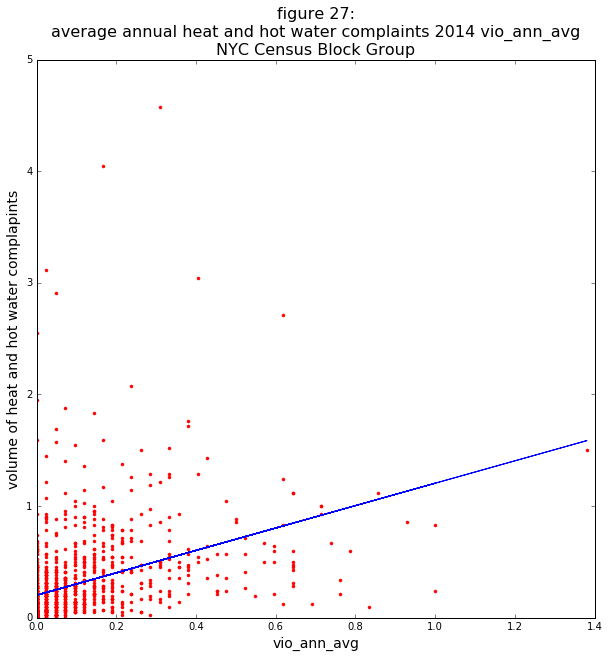

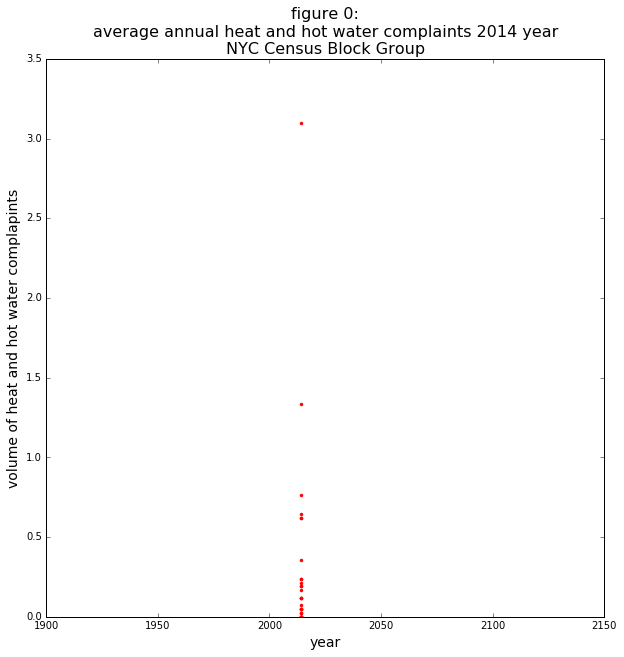

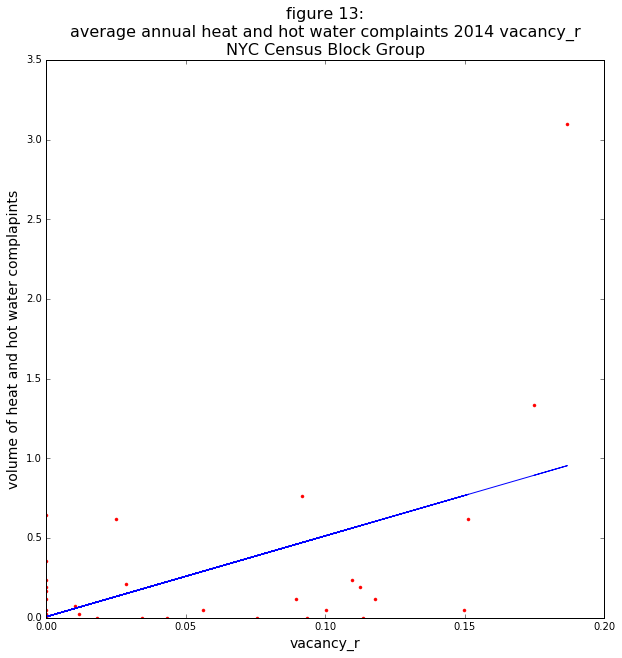

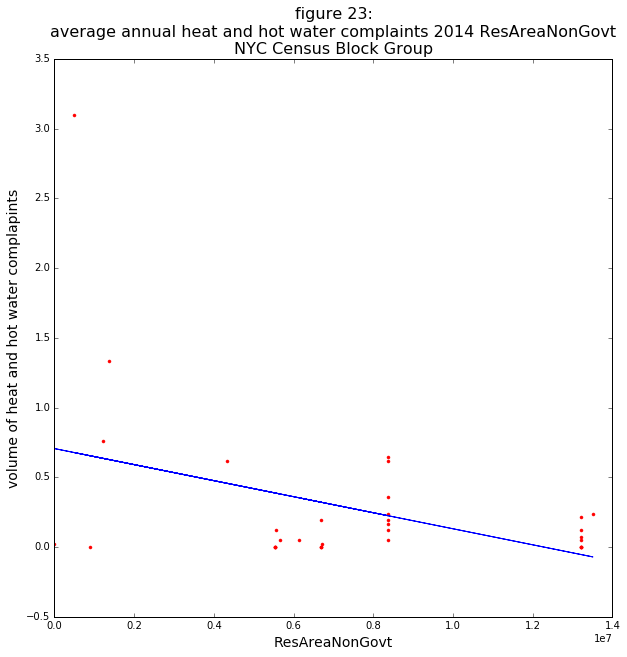

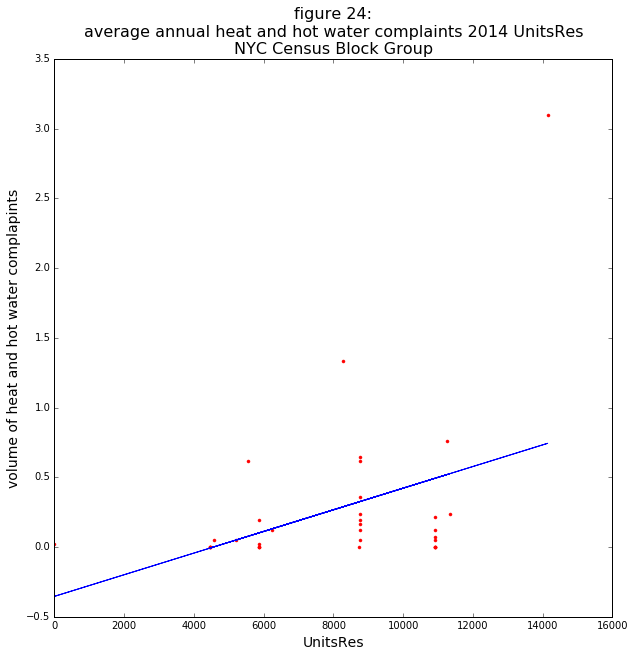

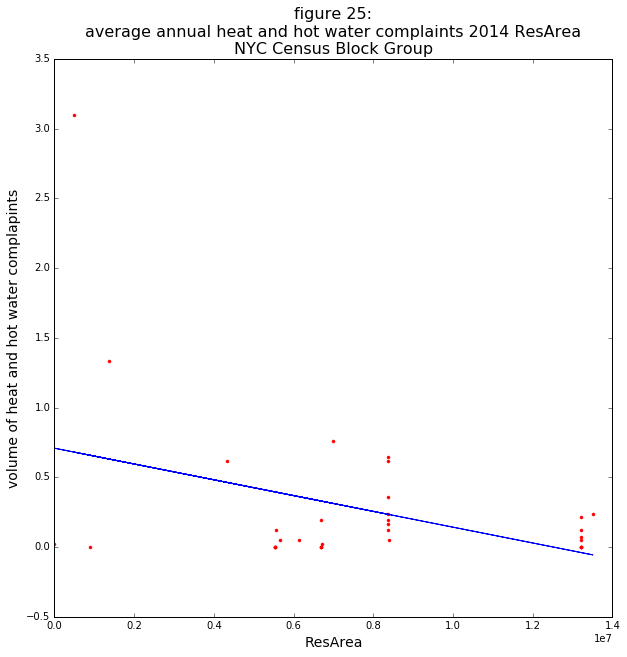

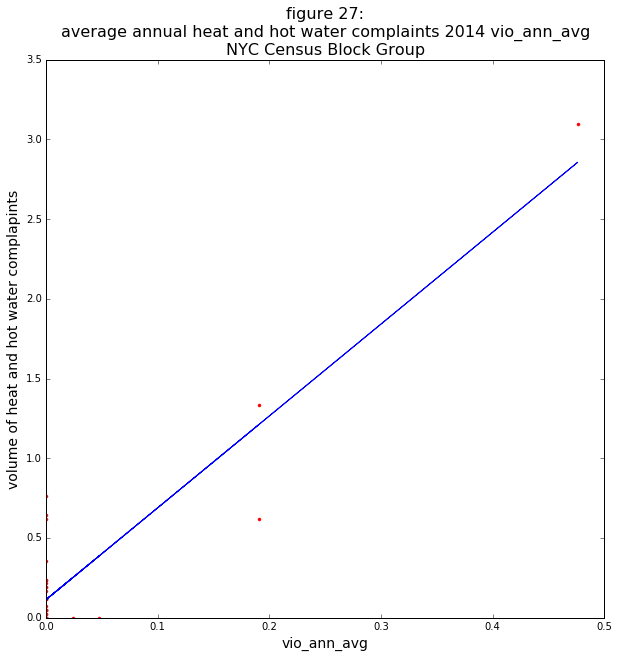

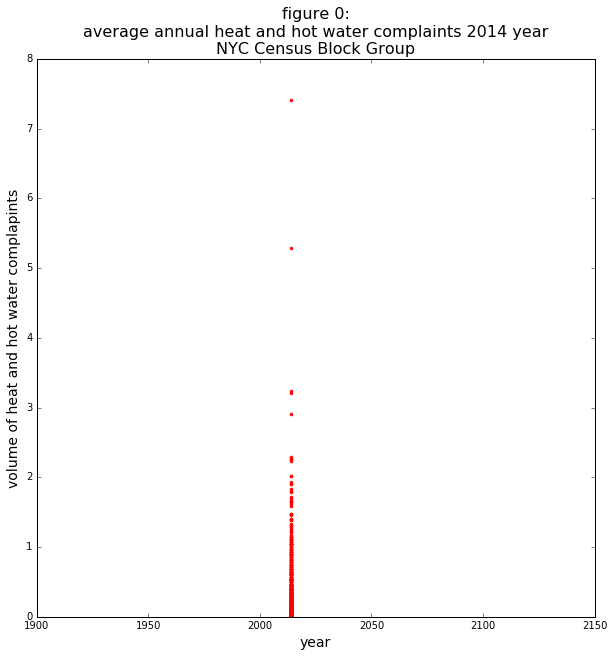

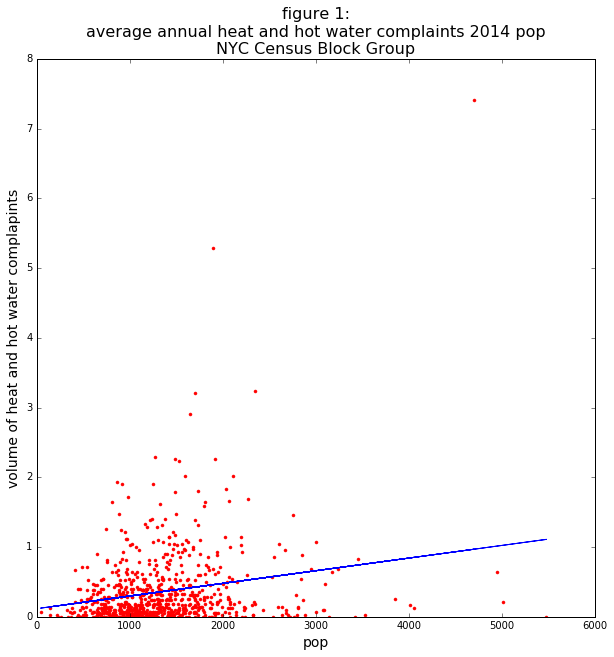

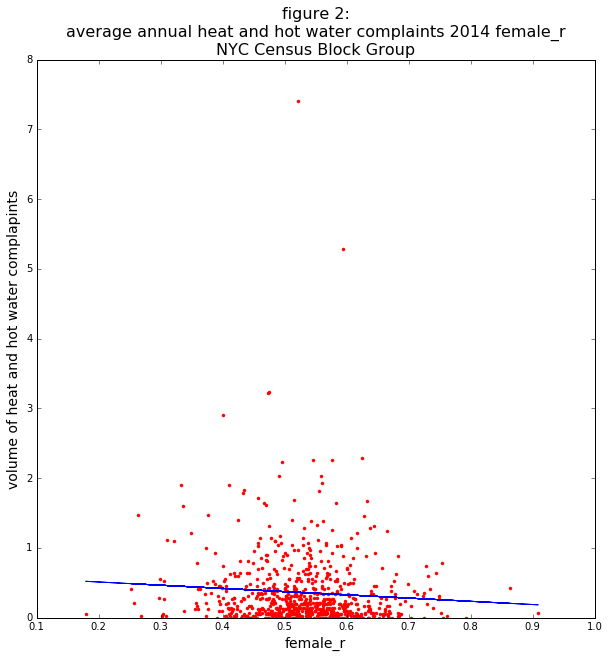

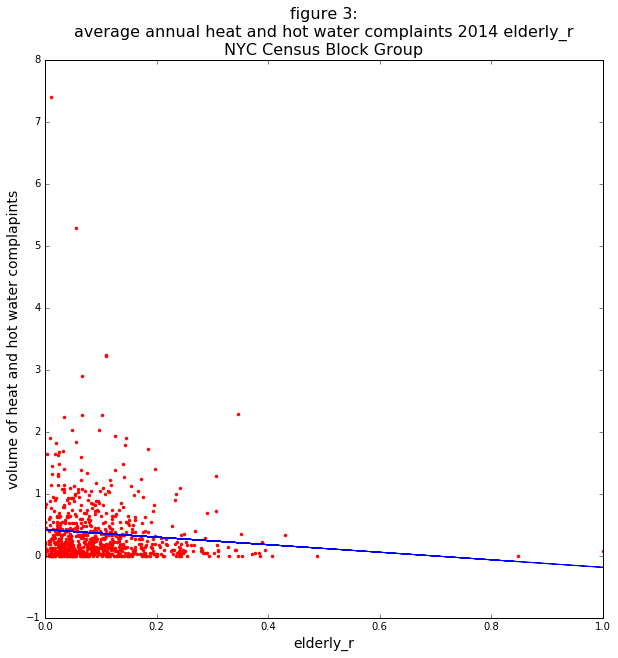

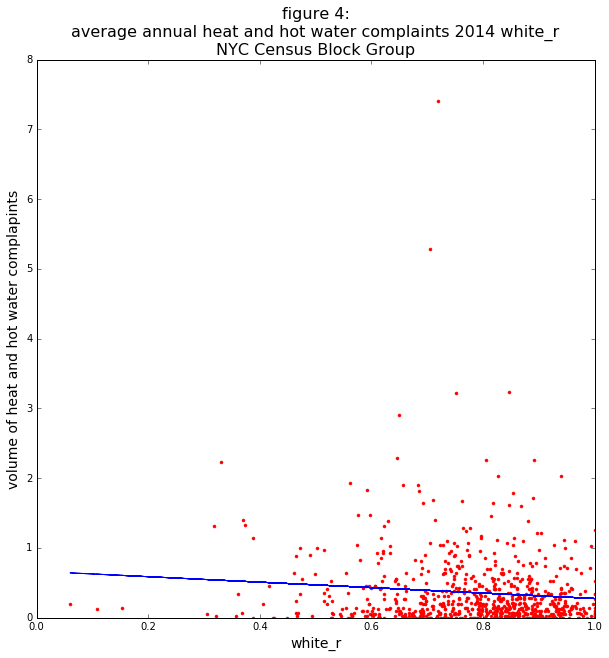

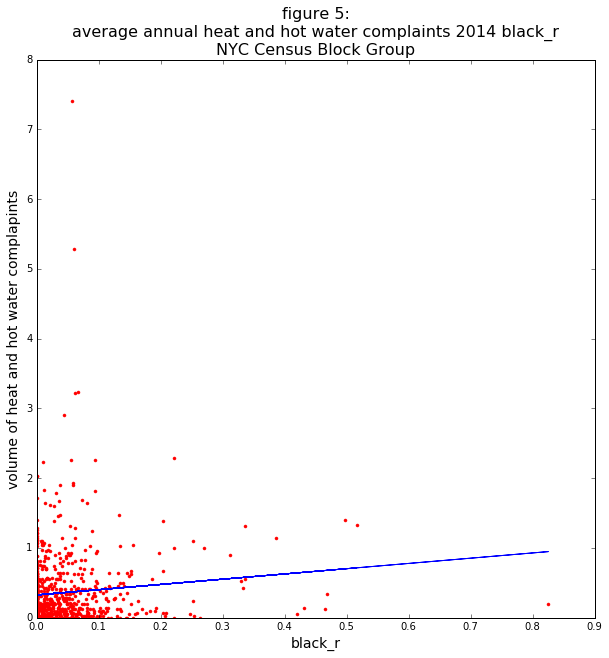

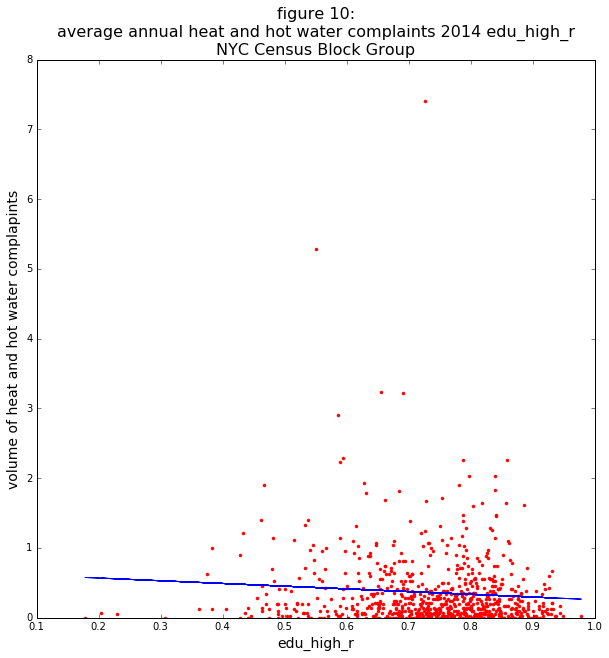

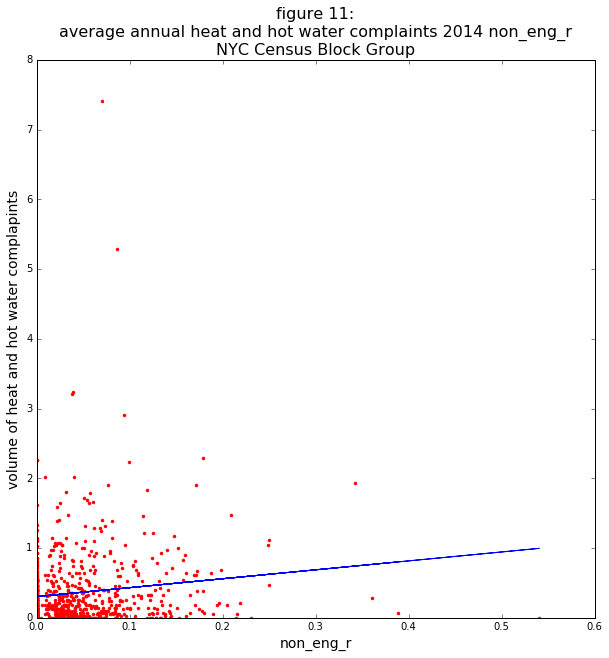

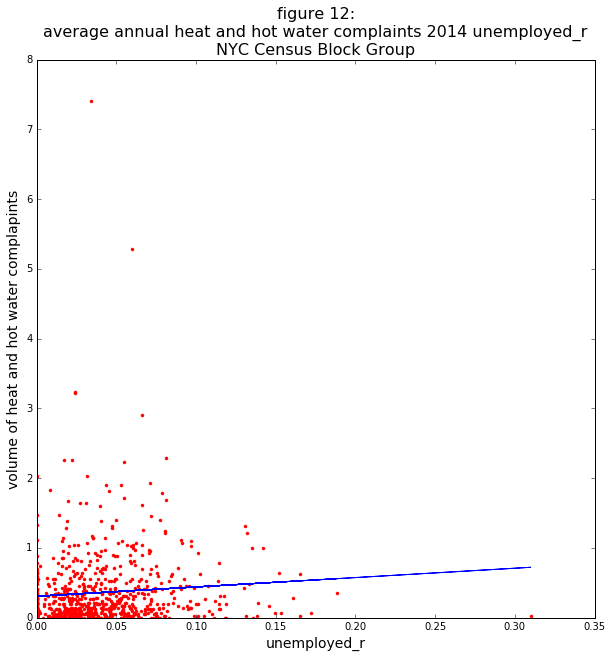

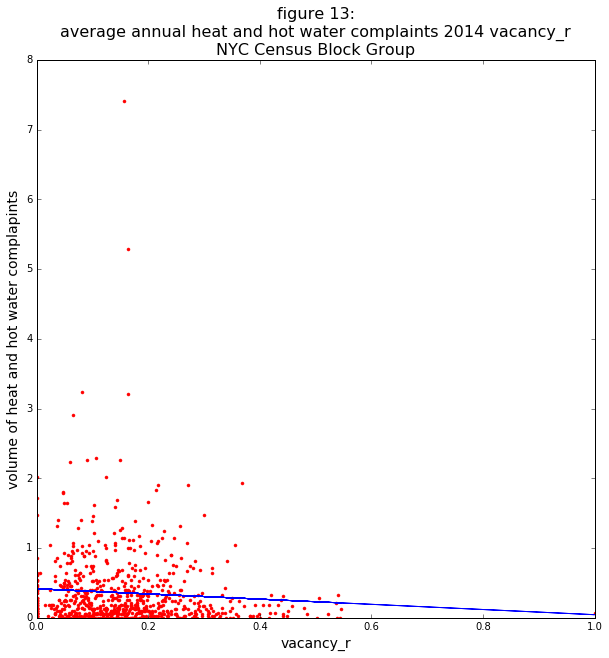

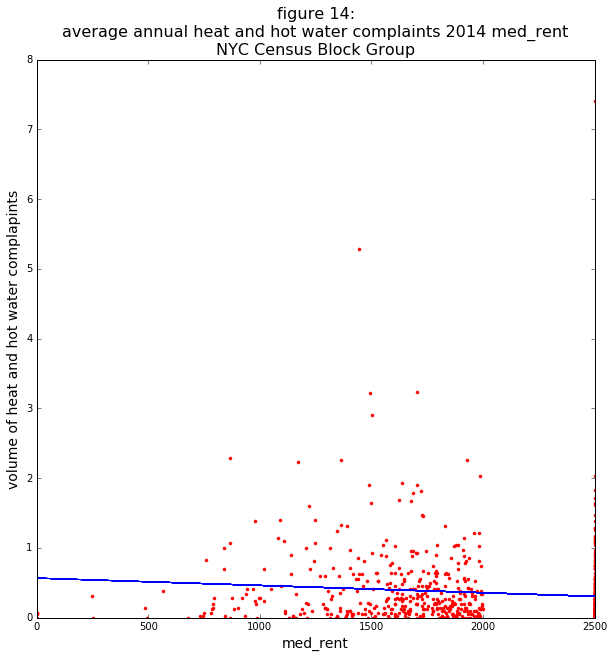

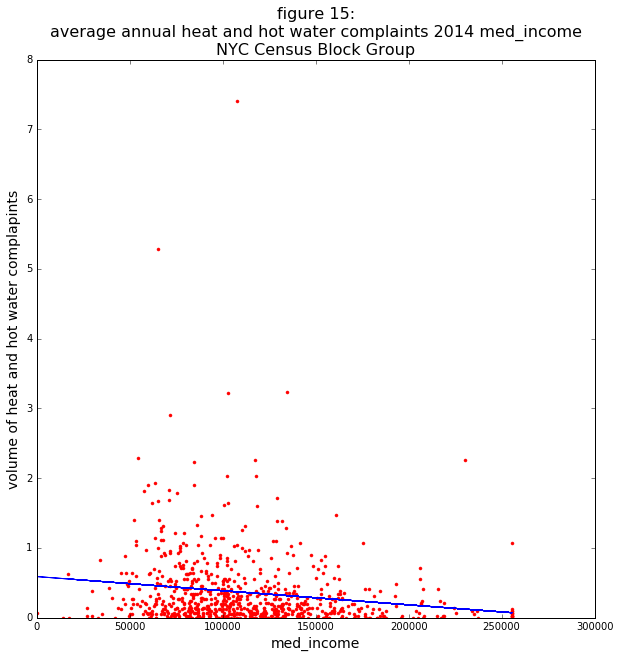

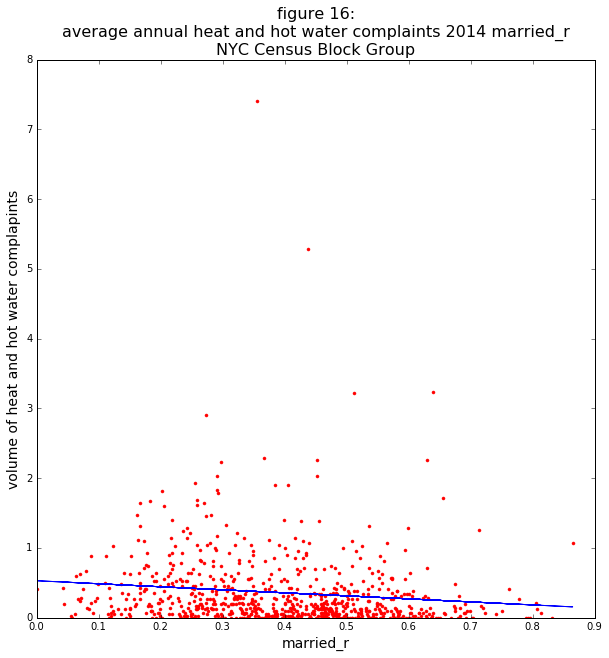

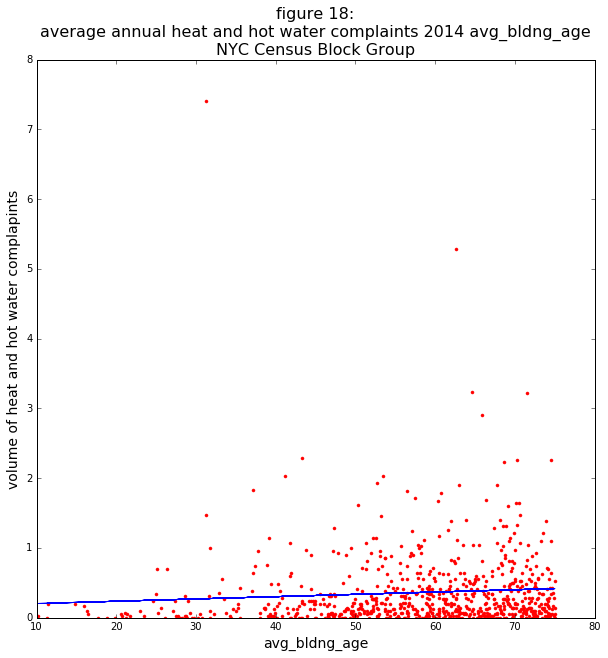

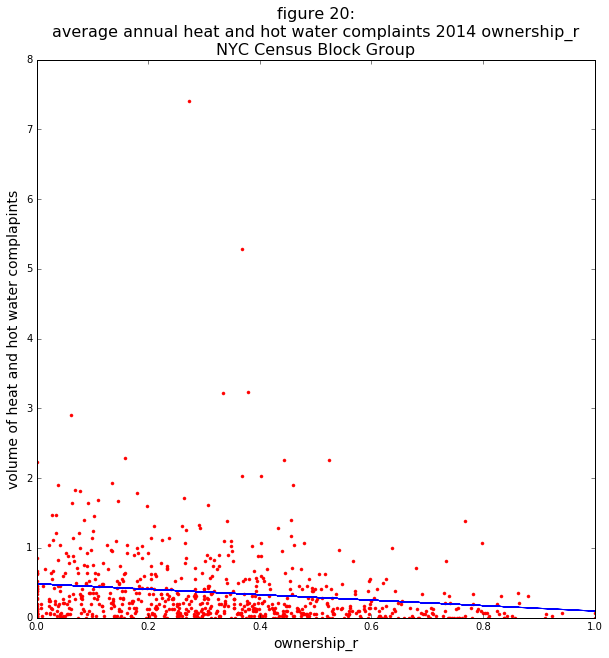

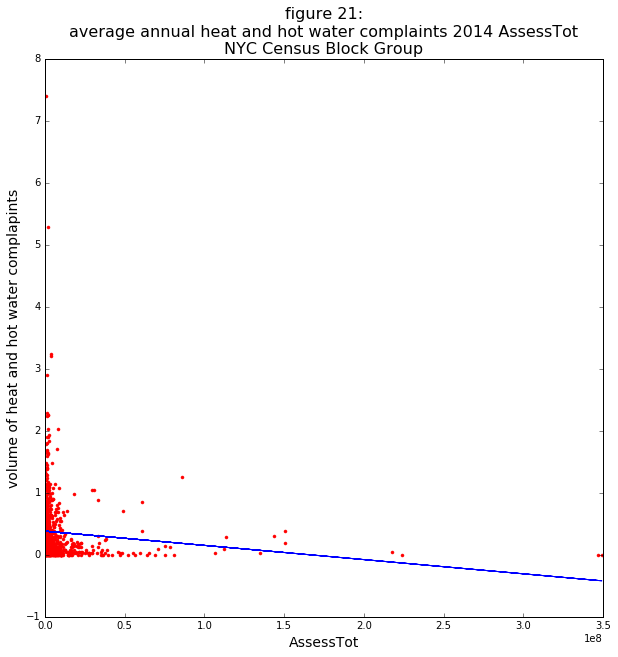

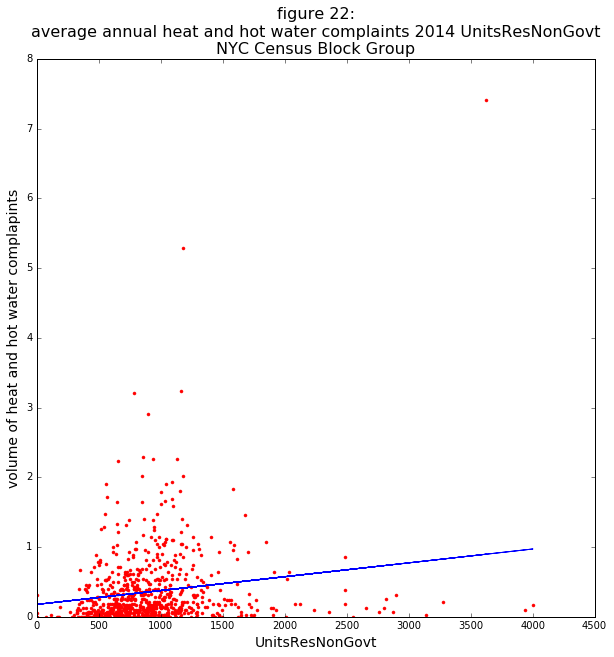

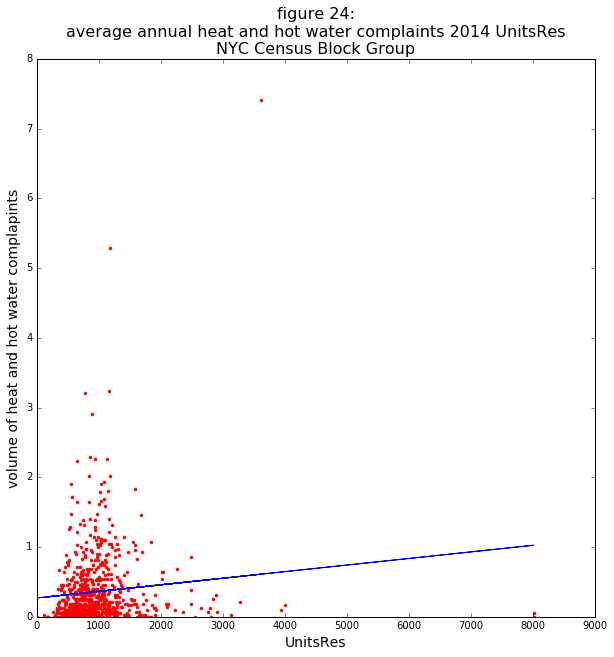

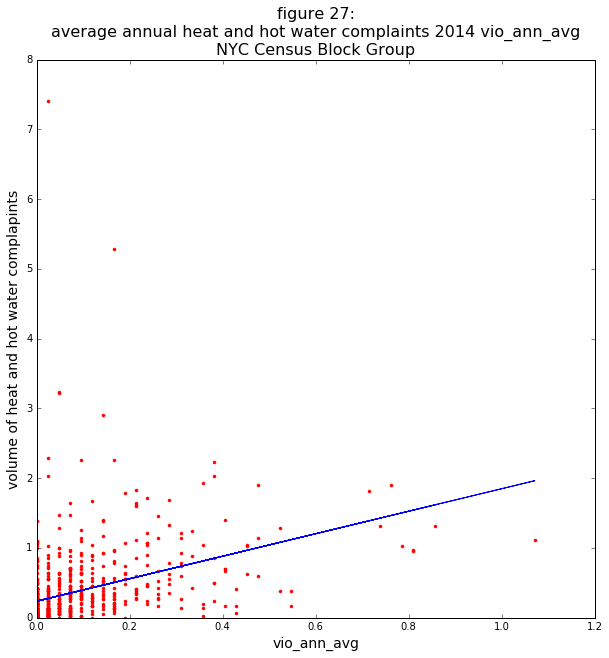

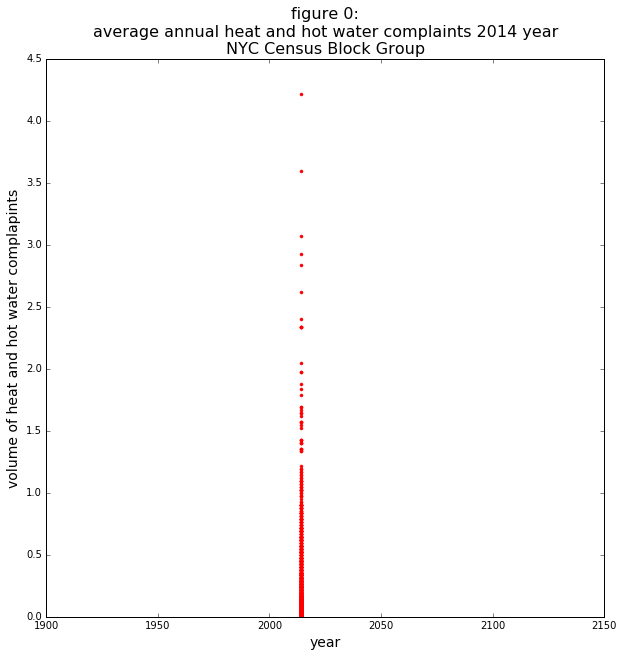

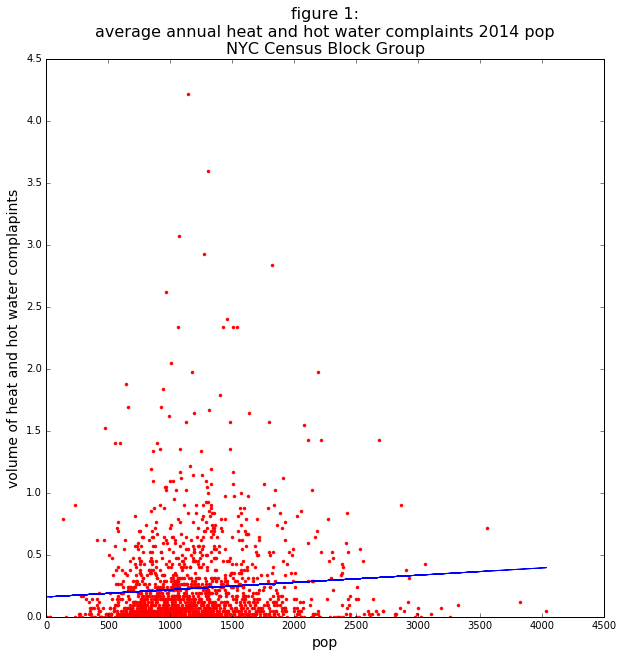

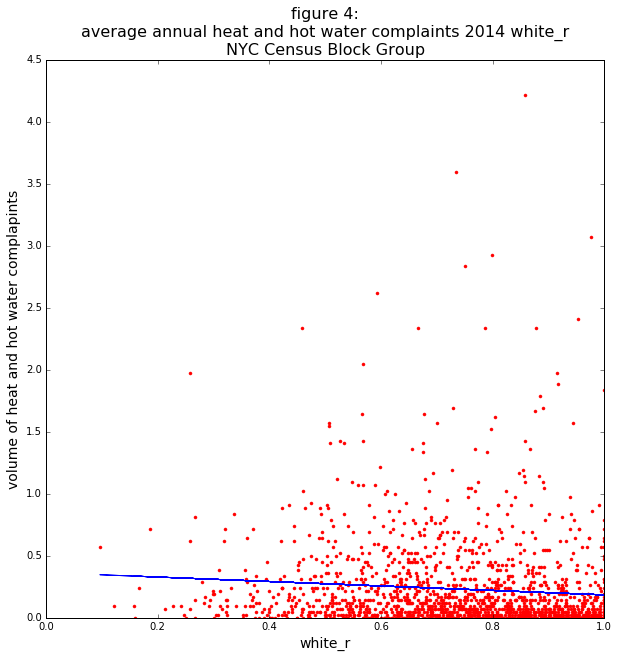

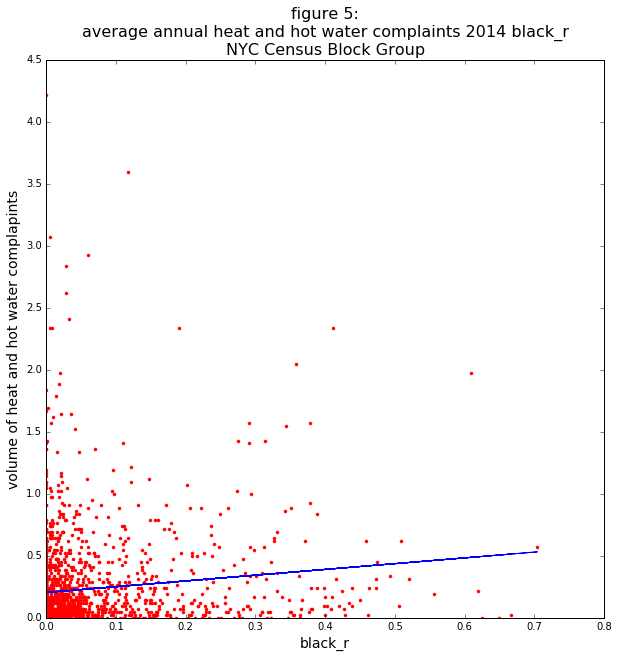

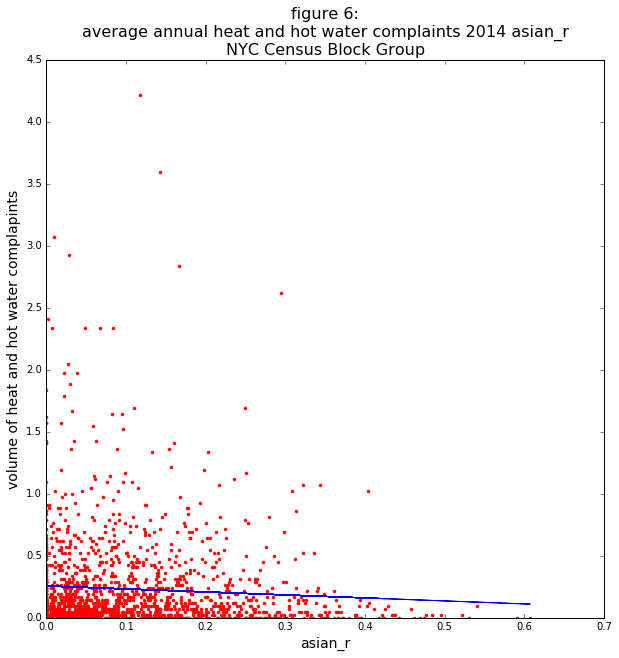

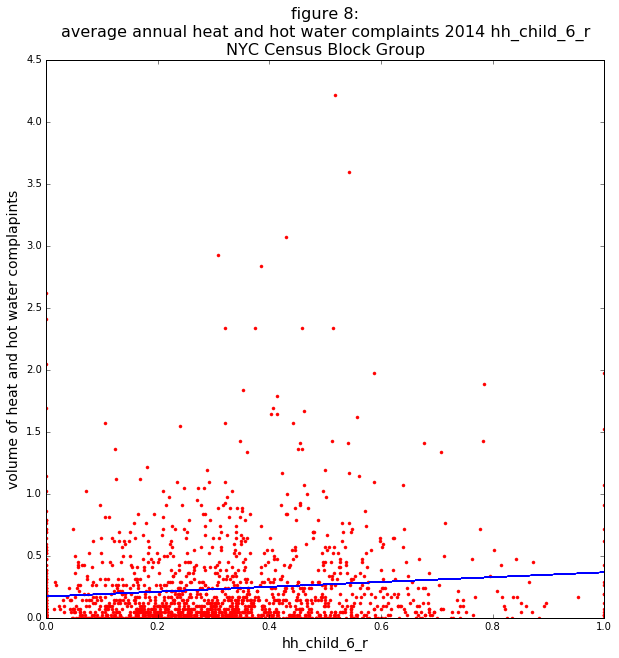

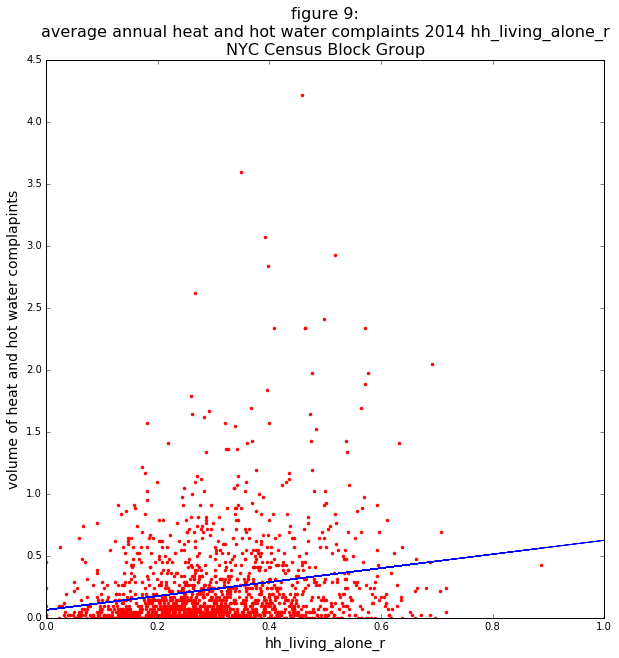

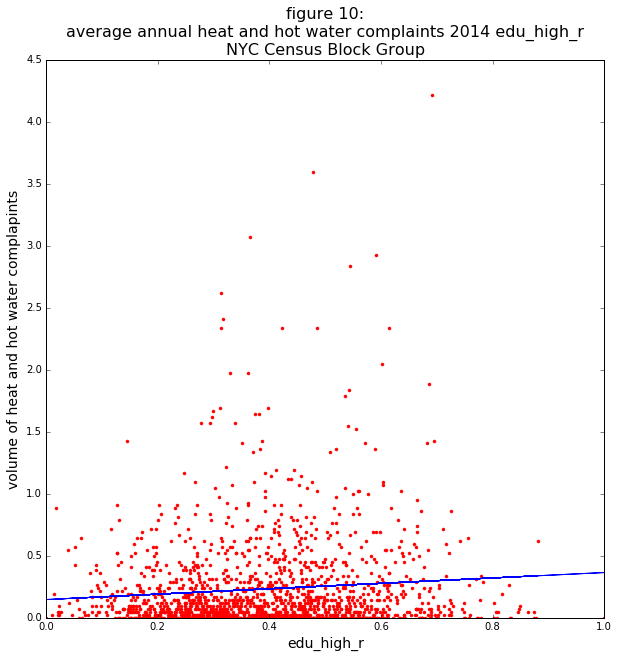

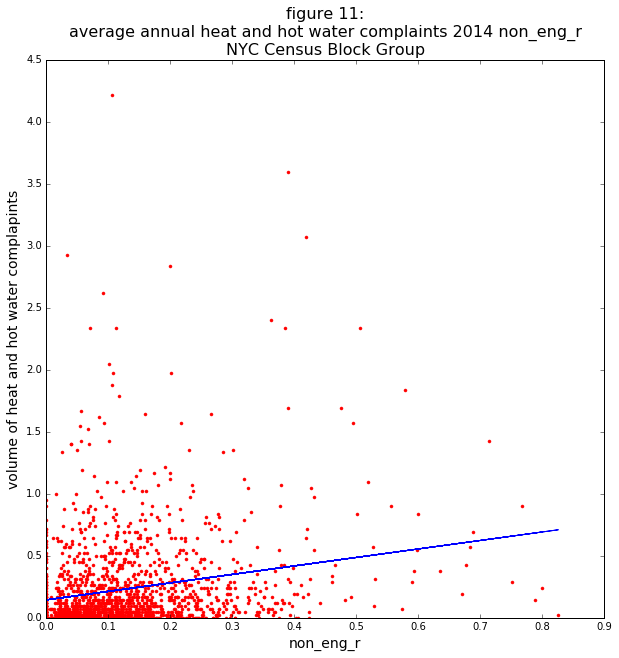

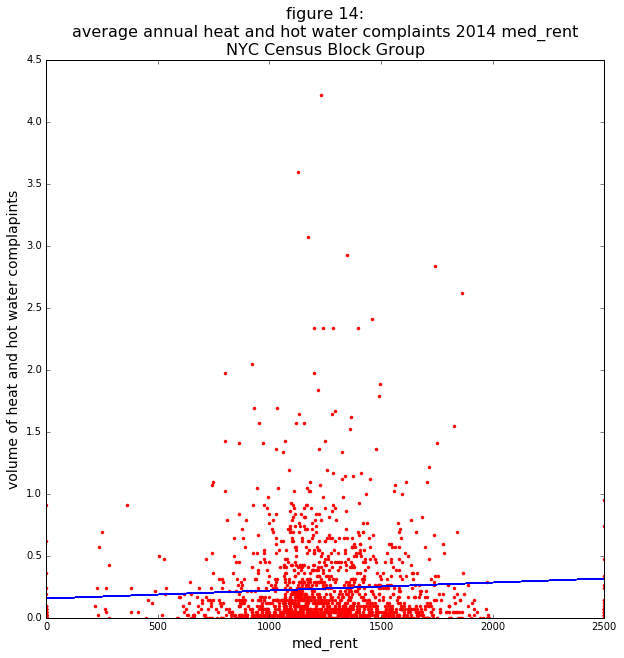

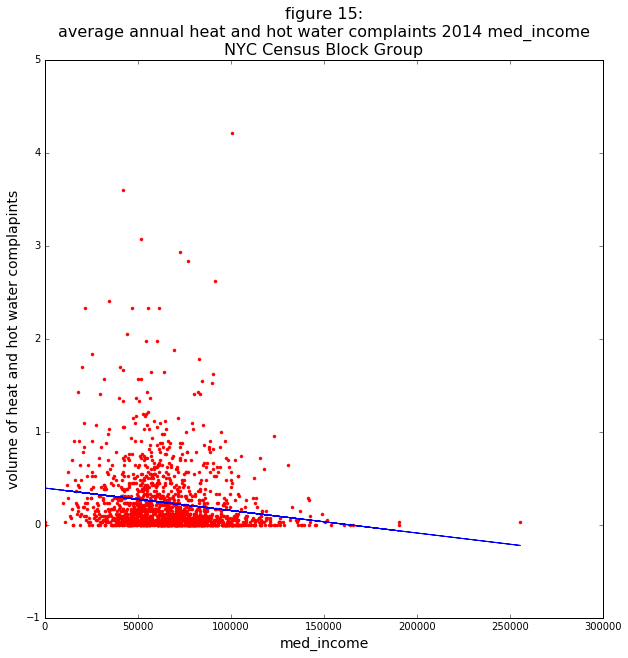

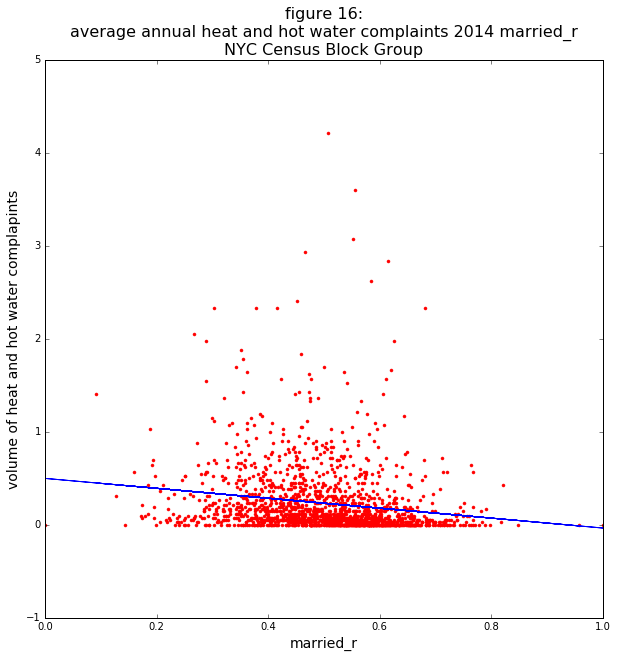

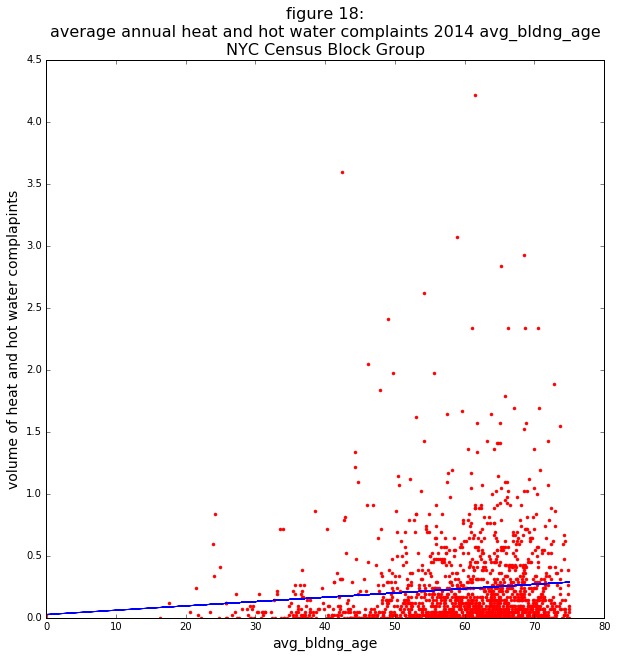

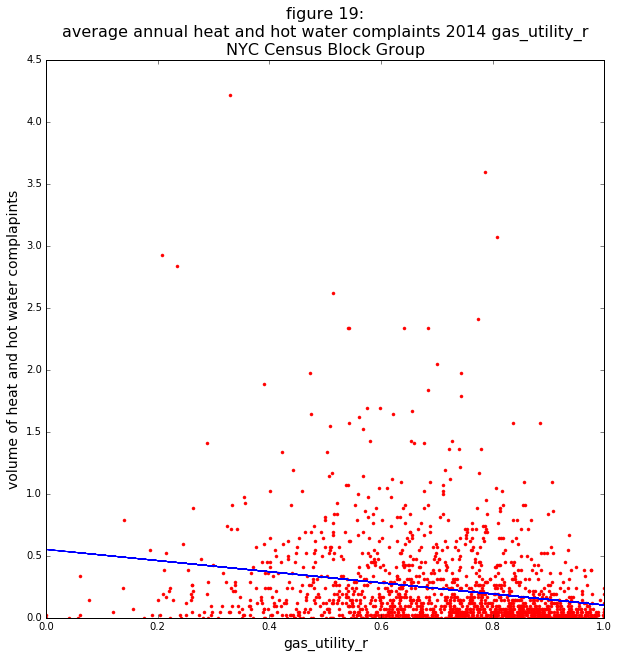

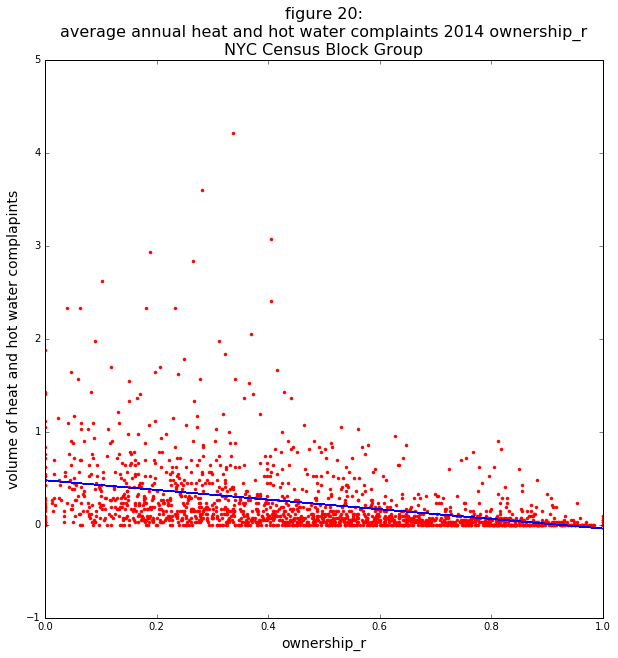

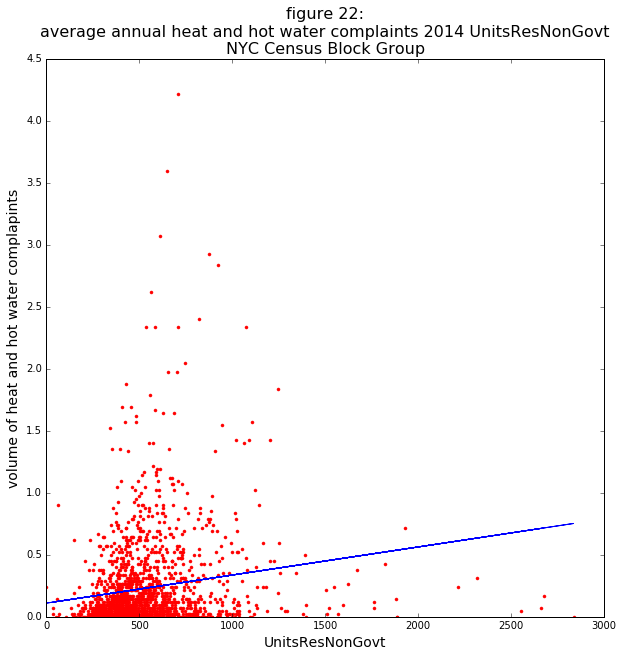

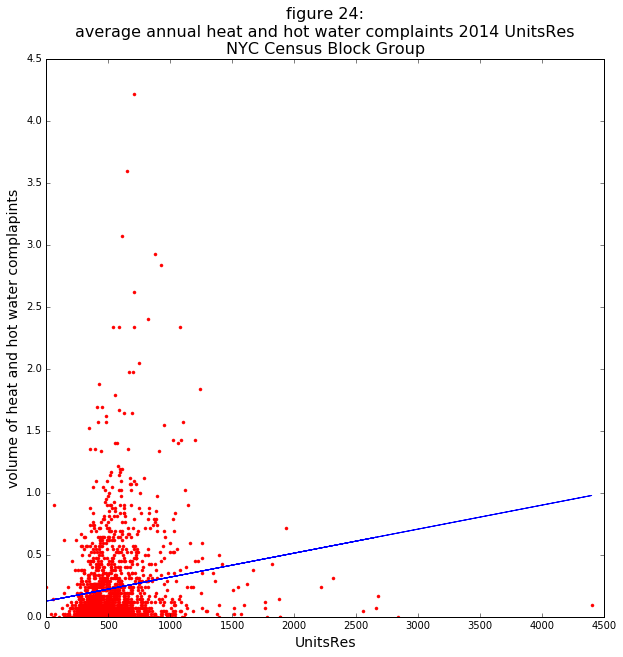

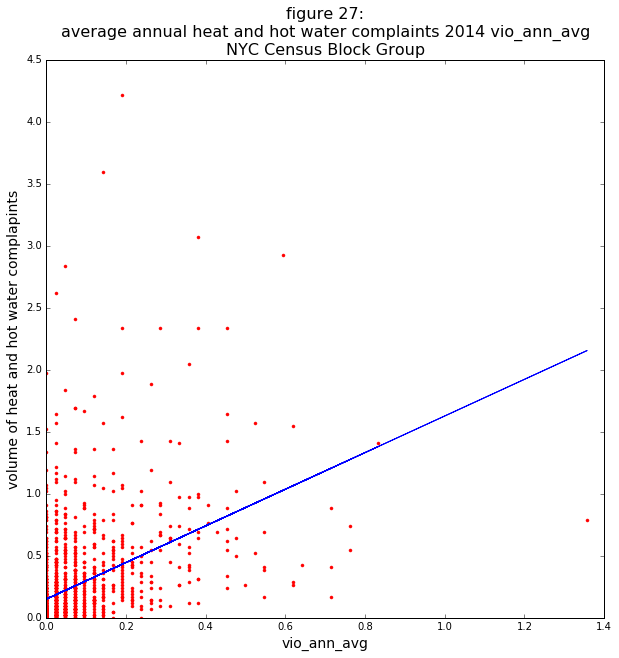

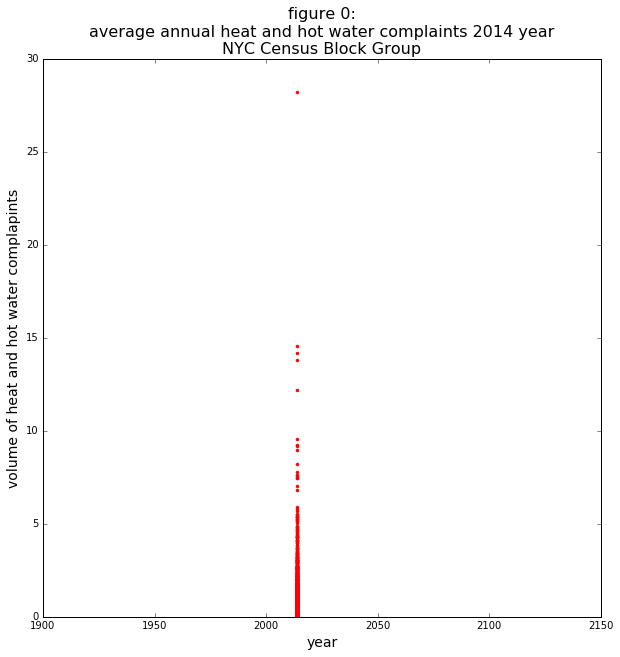

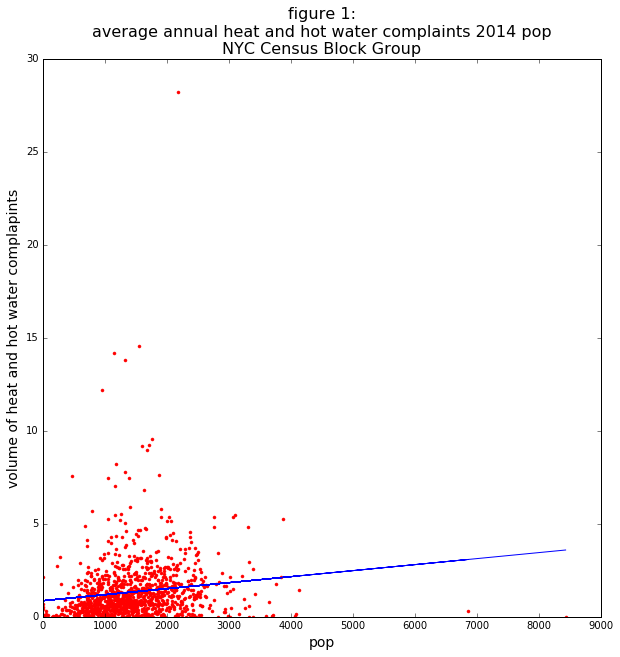

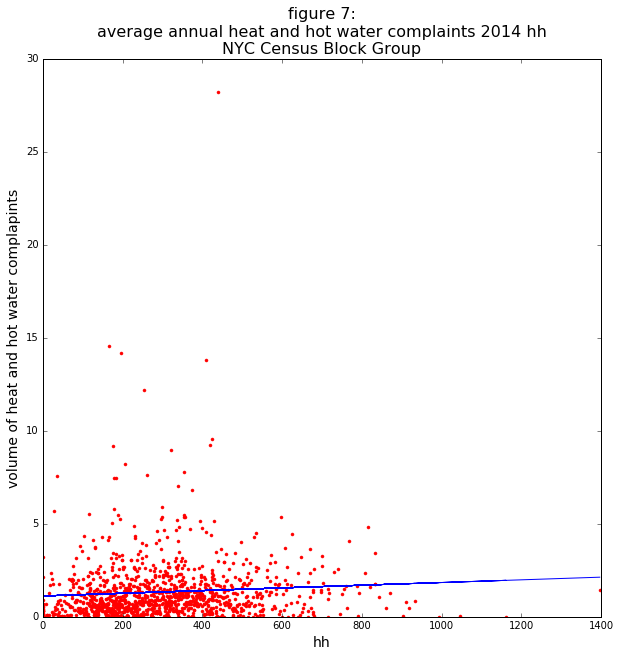

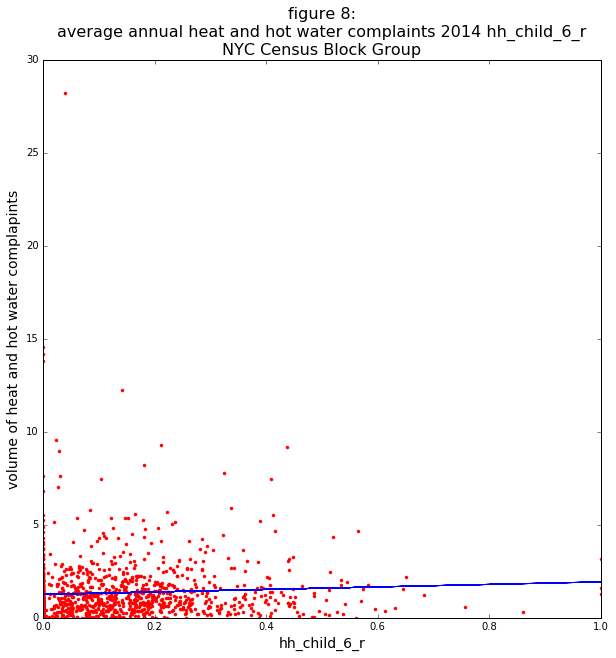

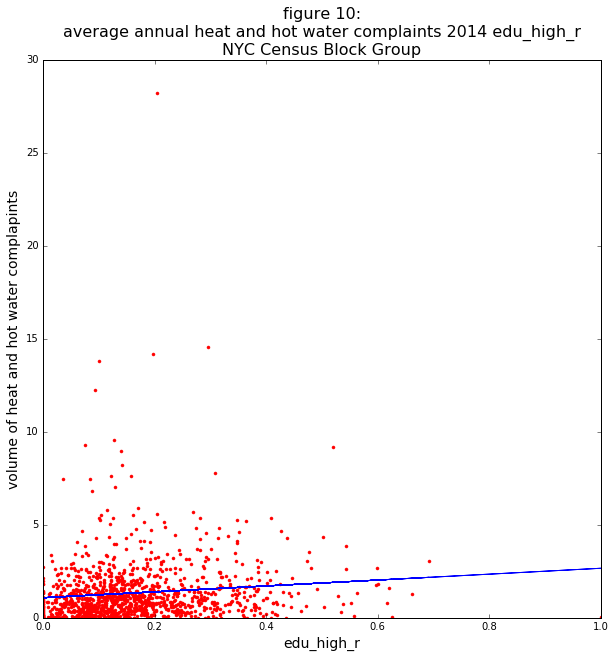

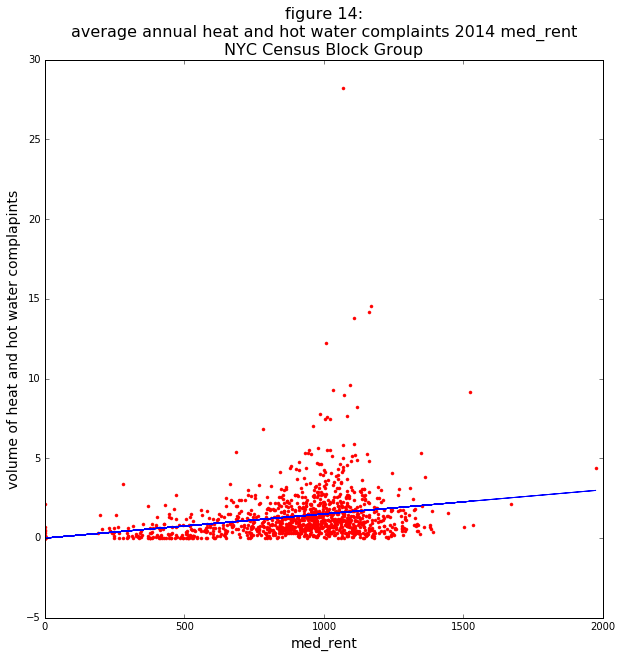

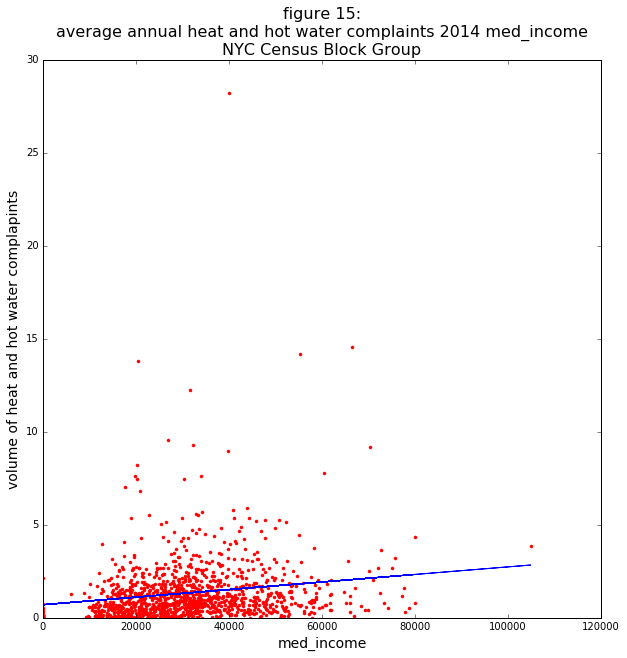

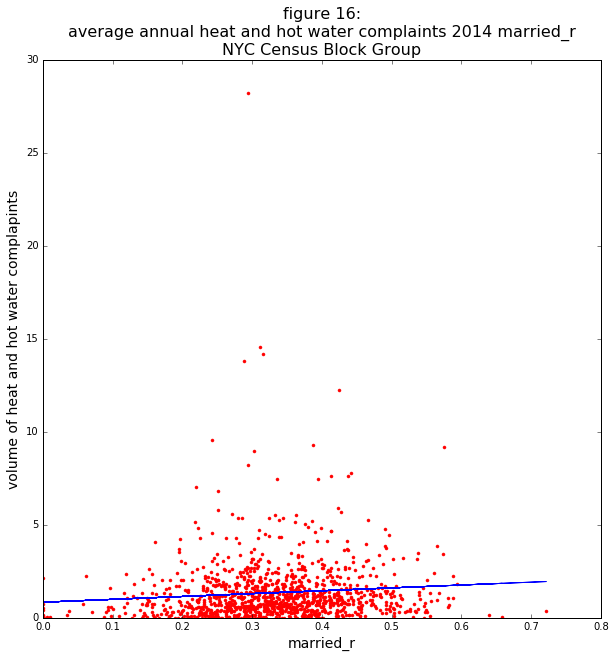

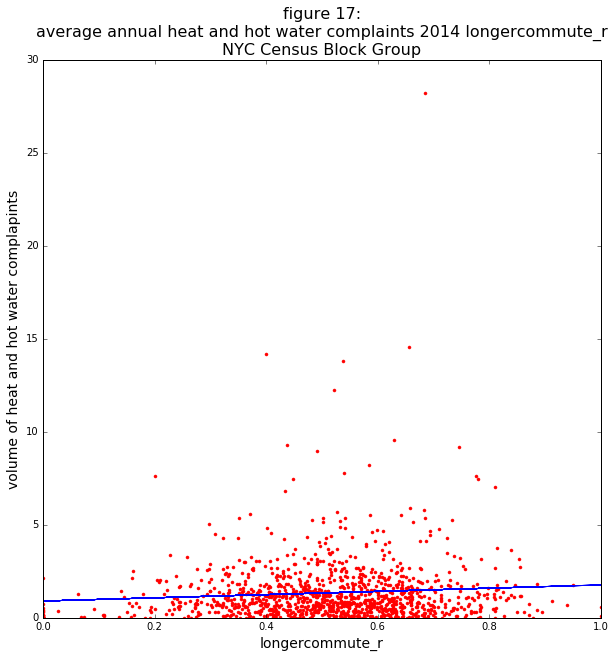

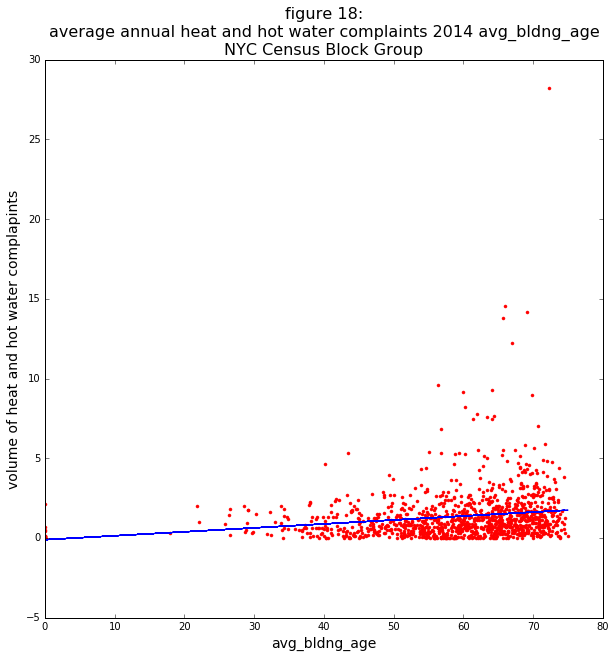

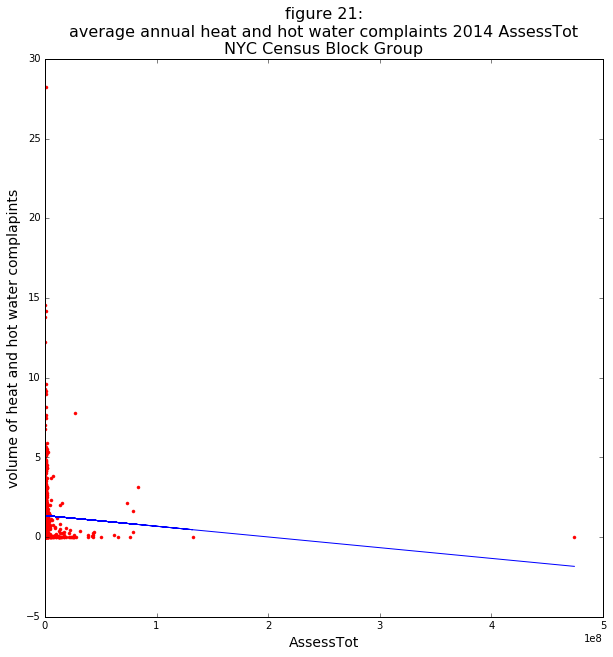

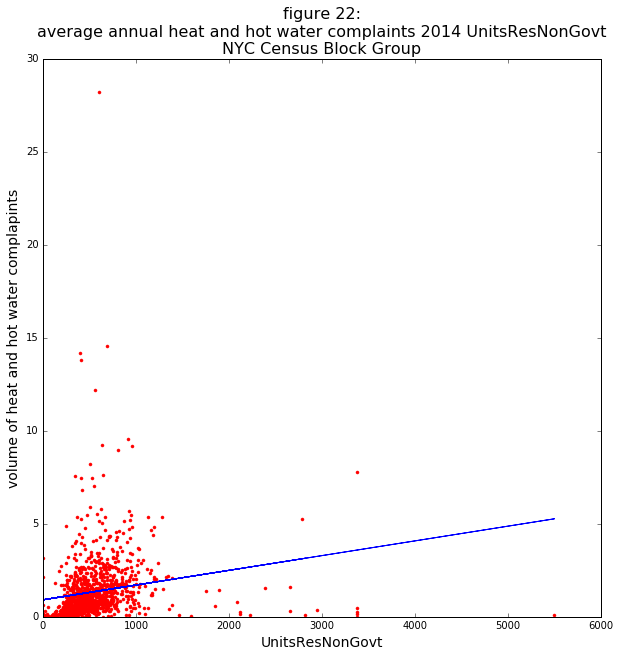

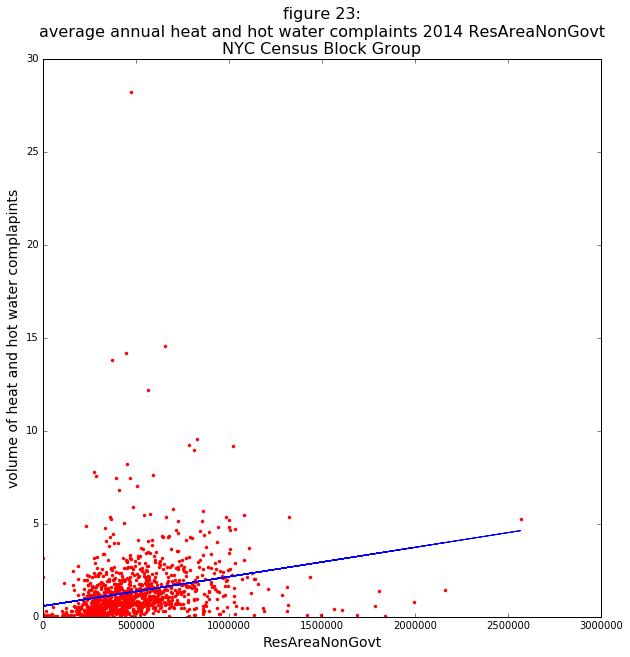

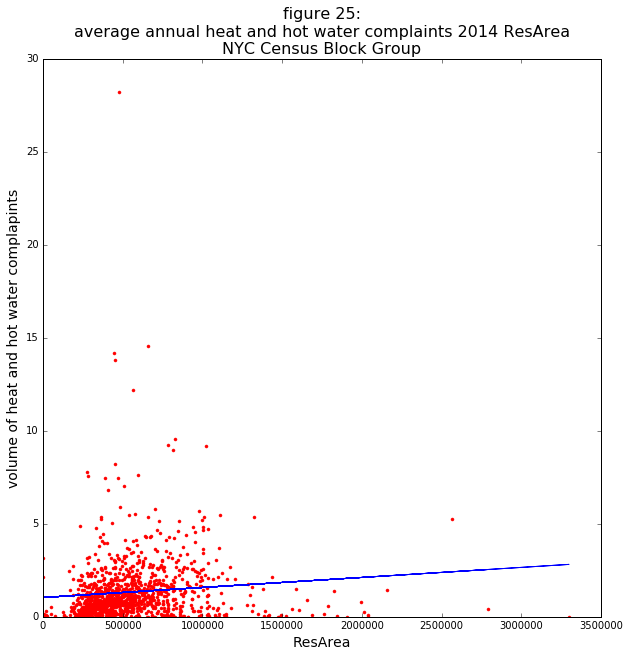

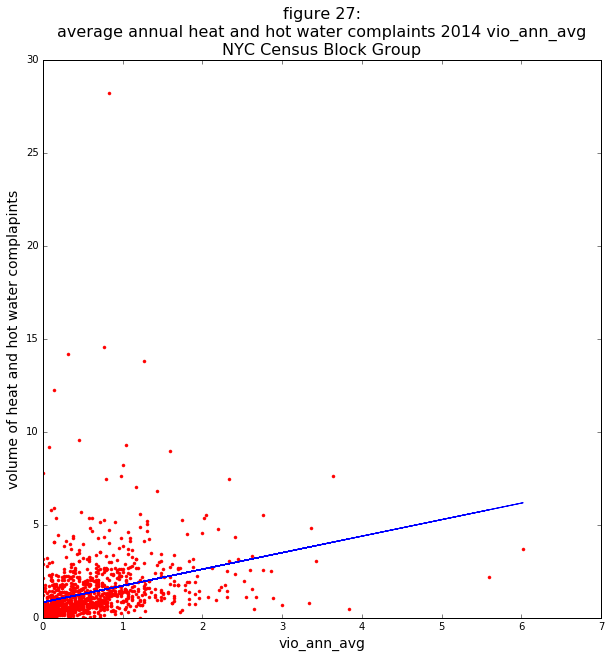

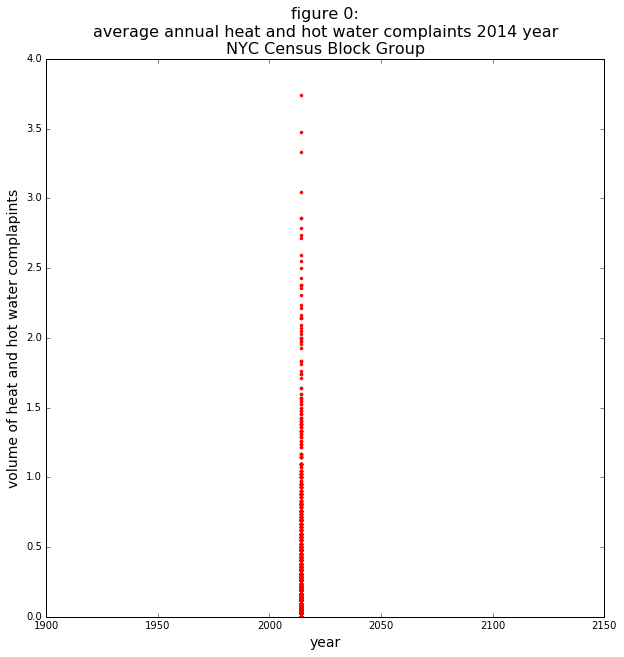

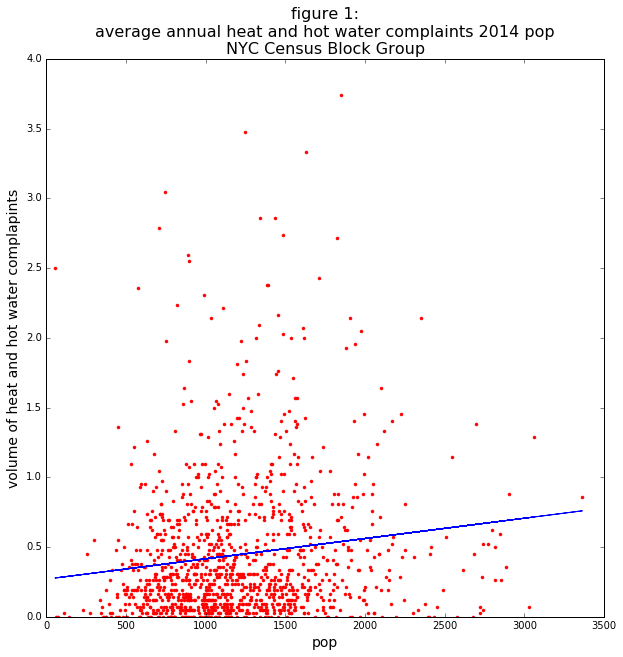

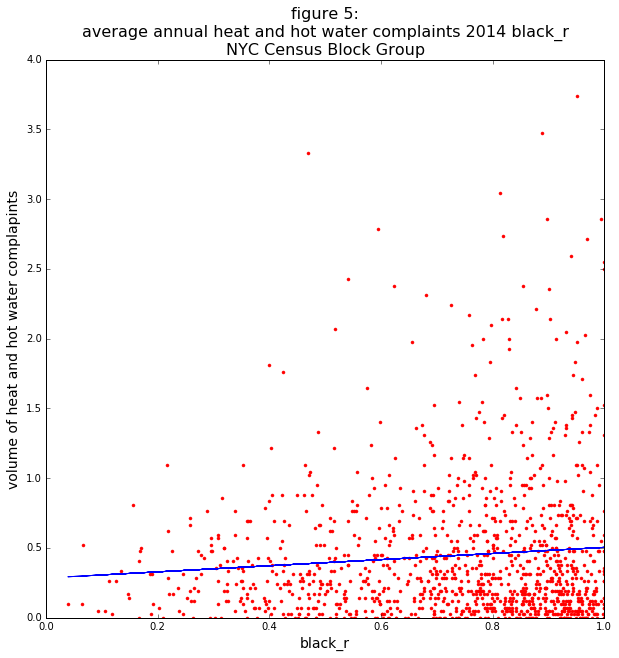

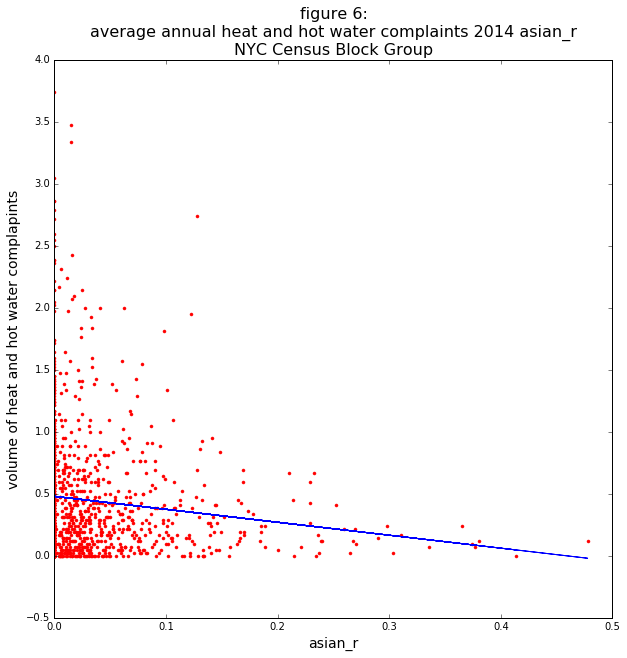

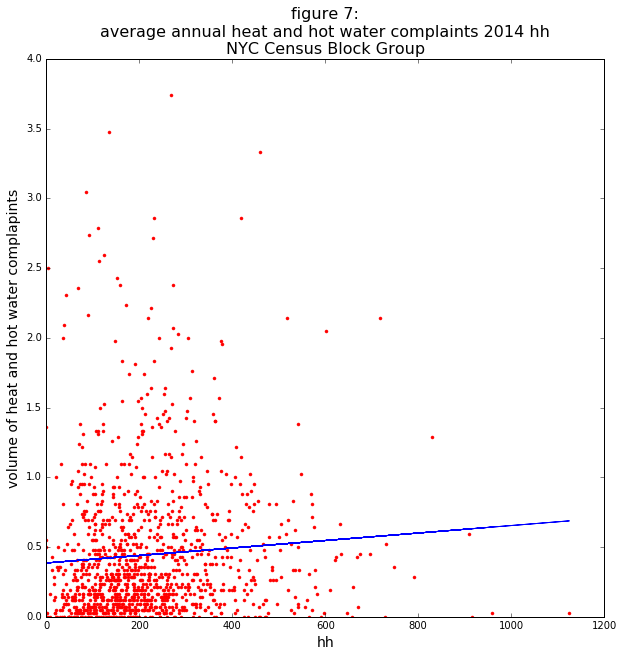

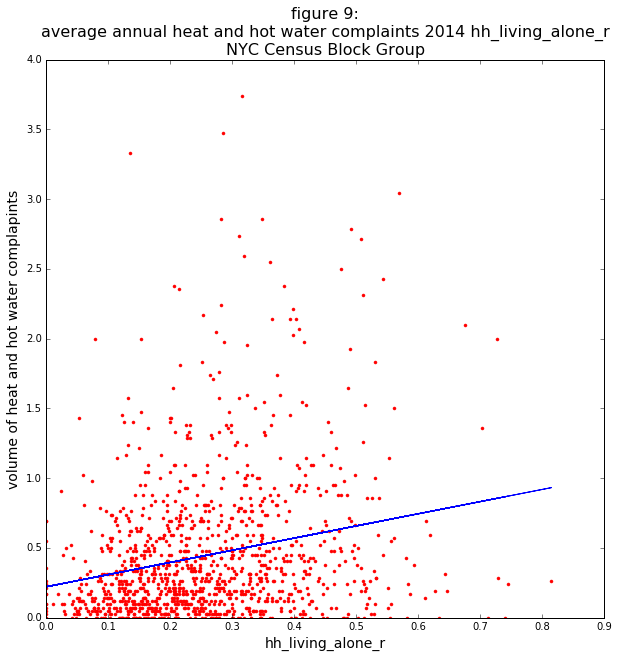

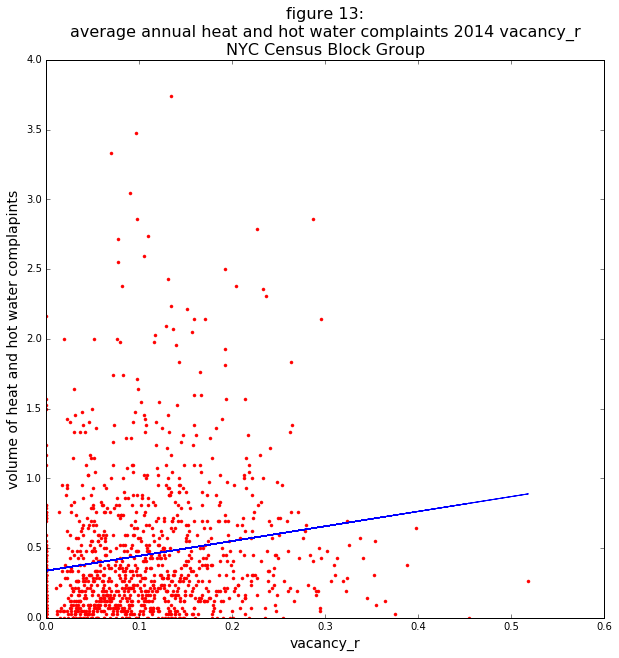

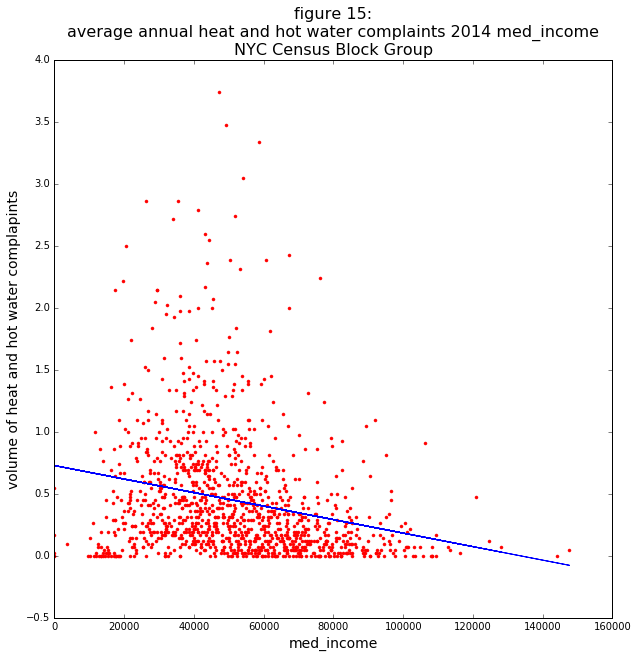

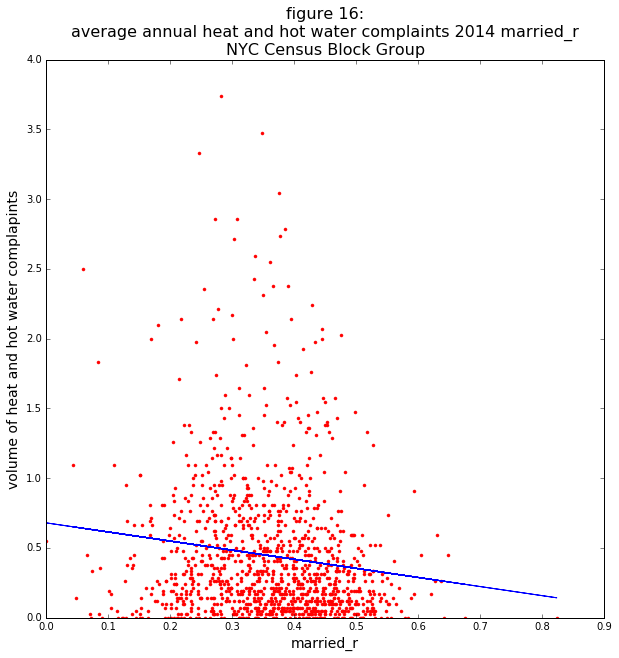

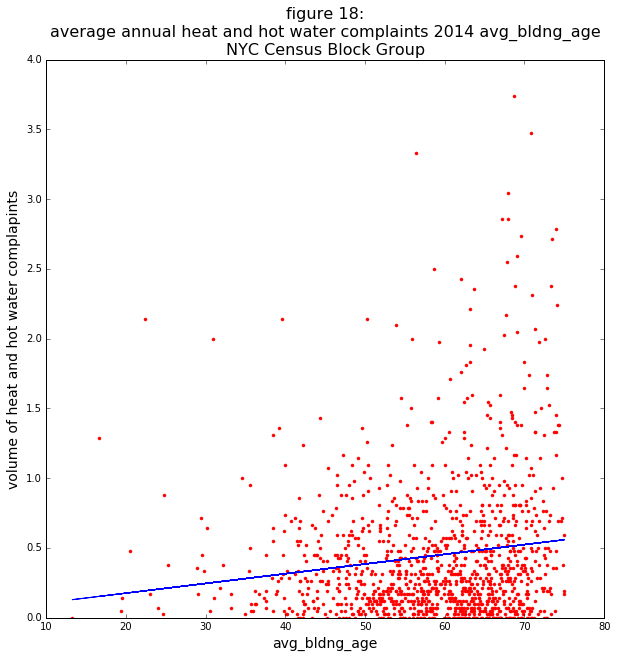

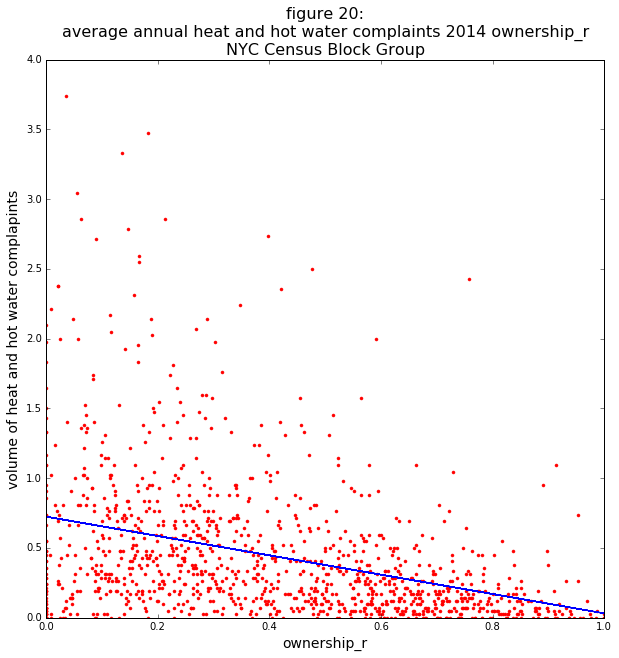

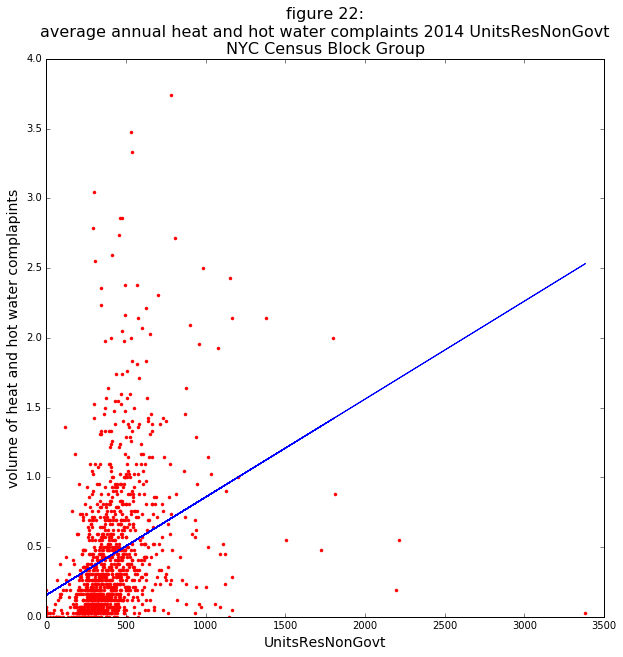

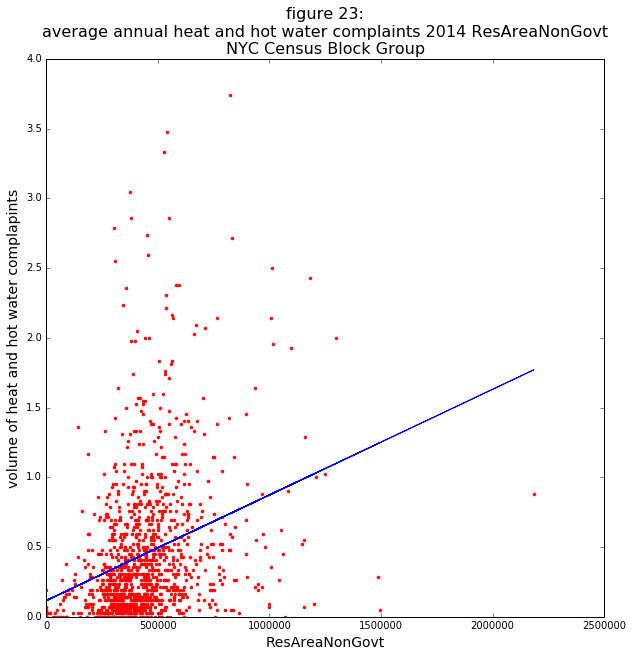

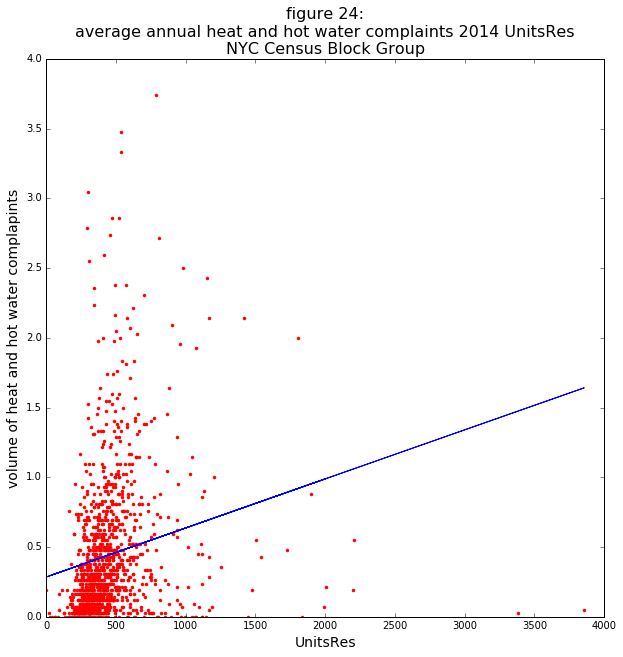

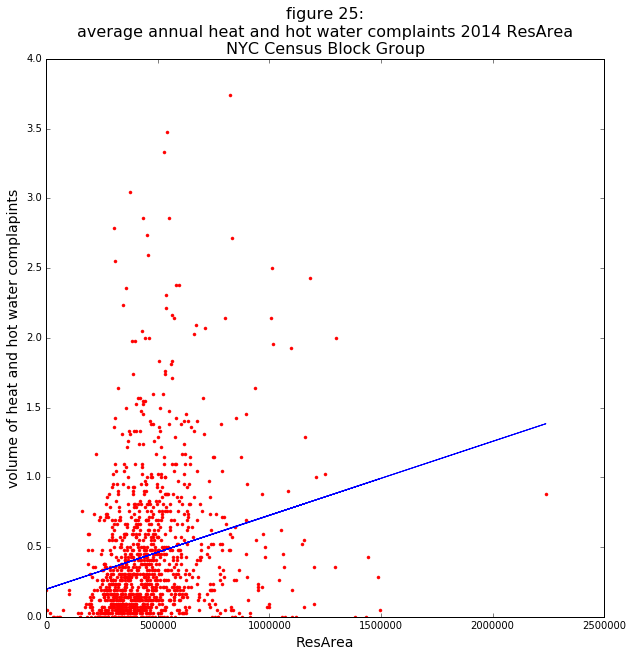

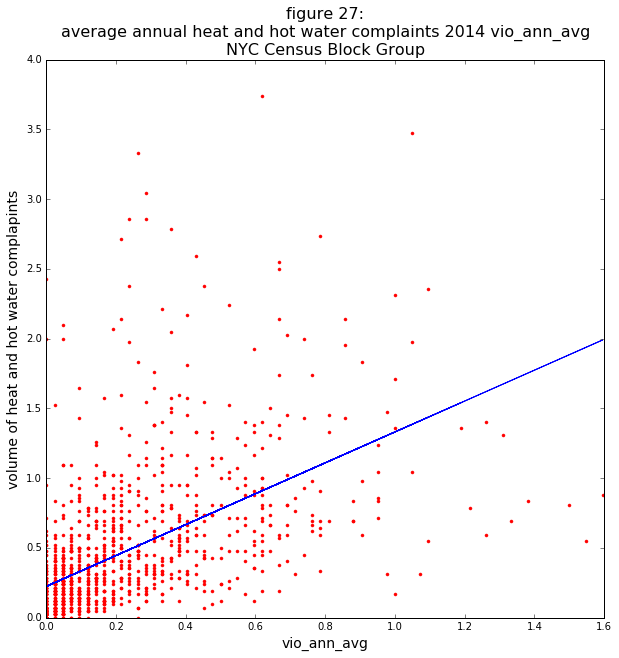

In [68]:
for i in range(0,len(demo_14_stand['cluster_label'].unique())):
    regress(dfs[i])

In [69]:
for i in range(0,len(demo_14['cluster'].unique())):
    results = smf.ols('com_ann_avg ~ ', data=dfs[i]).fit()
    print('Results for Cluster ' + str(i))
    print(results.summary())
    print('\n')

PatsyError: expected a noun, but instead the expression ended
    com_ann_avg ~
                ^

### cluster results
* cluster 0: non_english, avg_bldng_age, vio_ann_avg
* cluster 1: pop, elderly
* cluster 2: pop, white_r, married_r, longercommute_r, gas_utility_r, ownership_r, AssessTot, vio_ann_avg
* cluster 3: hh_living_along_r, vacancy_r, avg_bldng_age, ownership_r, ResAreaNonGovt, vio_ann_avg
* cluster 4: pop, hh_child_6_r, hh_living_alone_r, med_rent, vio_ann_avg
* cluster 5: .994 r2 and no significant variables, 31 rows in dataframe
* cluster 6: female_r, white_r, med_income, gas_utility_r, ownership_r, AssessTot, UnitsResNonGovt, vio_ann_avg
* cluster 7: asian_r, edu_high_r, non_eng_r, ownership_r, vio_ann_avg
* cluster 8: white_r, med_rent, gas_utility_r, ownership_r, UnitsResNonGovt, ResAreaNonGovt, ResArea, vio_ann_avg
* cluster 9: nan / only one row in cluster 
* cluster 10: pop, AssessTot

In [ ]:
for elem in dfs:
    print(len(elem))

In [ ]:
results = smf.ols('com_ann_avg ~ non_eng_r + avg_bldng_age + vio_ann_avg', data=dfs[0]).fit()
print(results.rsquared)
results = smf.ols('com_ann_avg ~ pop + elderly_r', data=dfs[1]).fit()
print(results.rsquared)
results = smf.ols('com_ann_avg ~ pop + white_r + married_r + longercommute_r + gas_utility_r + ownership_r + AssessTot + vio_ann_avg', data=dfs[2]).fit()
print(results.rsquared)
results = smf.ols('com_ann_avg ~ hh_living_alone_r + vacancy_r + avg_bldng_age + ownership_r + ResAreaNonGovt + vio_ann_avg', data=dfs[3]).fit()
print(results.rsquared)